## LIBRARIES

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [32]:
# importing libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.utils
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit  # splitting the dataset
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import ADASYN
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier, KerasRegressor

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from collections import Counter

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Ensemble
from statistics import mode

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## DATASET ANALYSIS AND PREPROCESSING

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# reading the dataset
# credit_data = pd.read_csv("/content/drive/MyDrive/IIT/Academics/Year 02/Semester 01/CM2603 Data Science Group Project/Group 02/Data Set/creditcard_2023.csv")
credit_data = pd.read_csv("creditcard_2023.csv")
# displaying the head of the dataset
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
# number of instances and attributes
credit_data.shape

(568630, 31)

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [10]:
# sum of missing cells for each attribute
credit_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# displaying the descriptive statistics of the dataset
credit_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


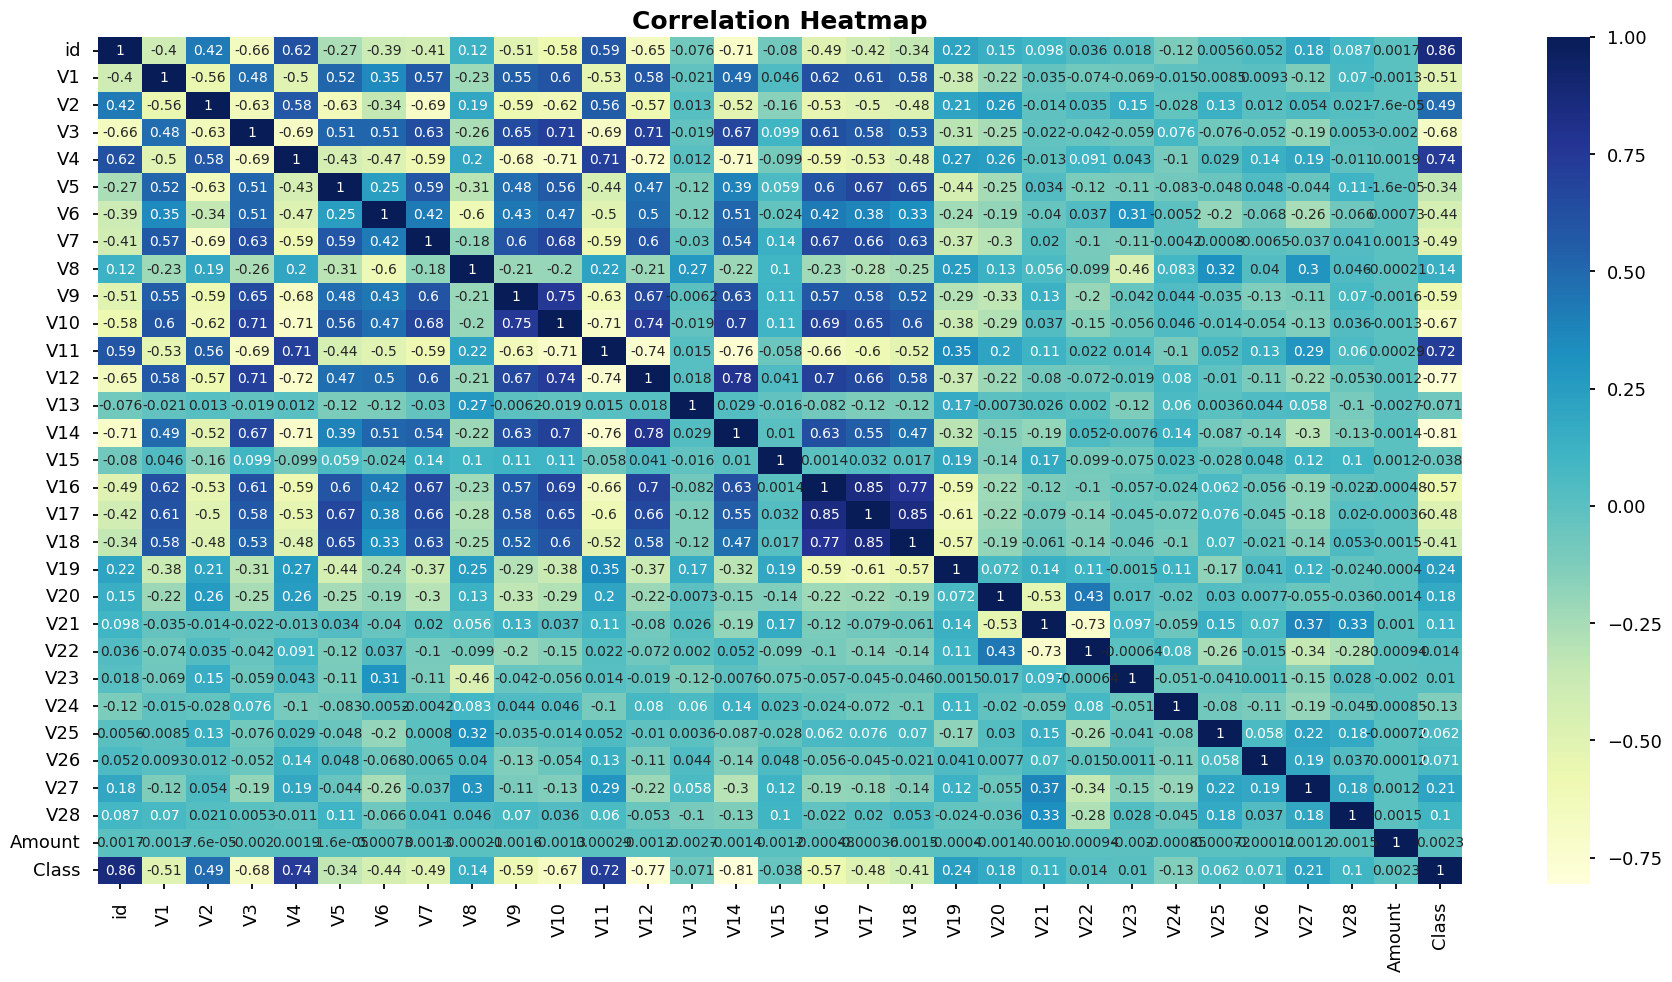

In [12]:
# displaying the corelation matrix of the dataframe
#corr = df.drop(columns=['Class']).corr()
#sns.heatmap(corr);

# style of the plot
plt.style.use("seaborn-v0_8-talk")

# figure size of the plot
plt.rcParams['figure.figsize']= (22,11)

plt.title("Correlation Heatmap",fontsize=18, weight= 'bold')

sns.heatmap(credit_data.corr(), cmap="YlGnBu", annot=True)

plt.show()

### CALCULATING THE RELEVANT FREQUENCIES OF THE CLASS

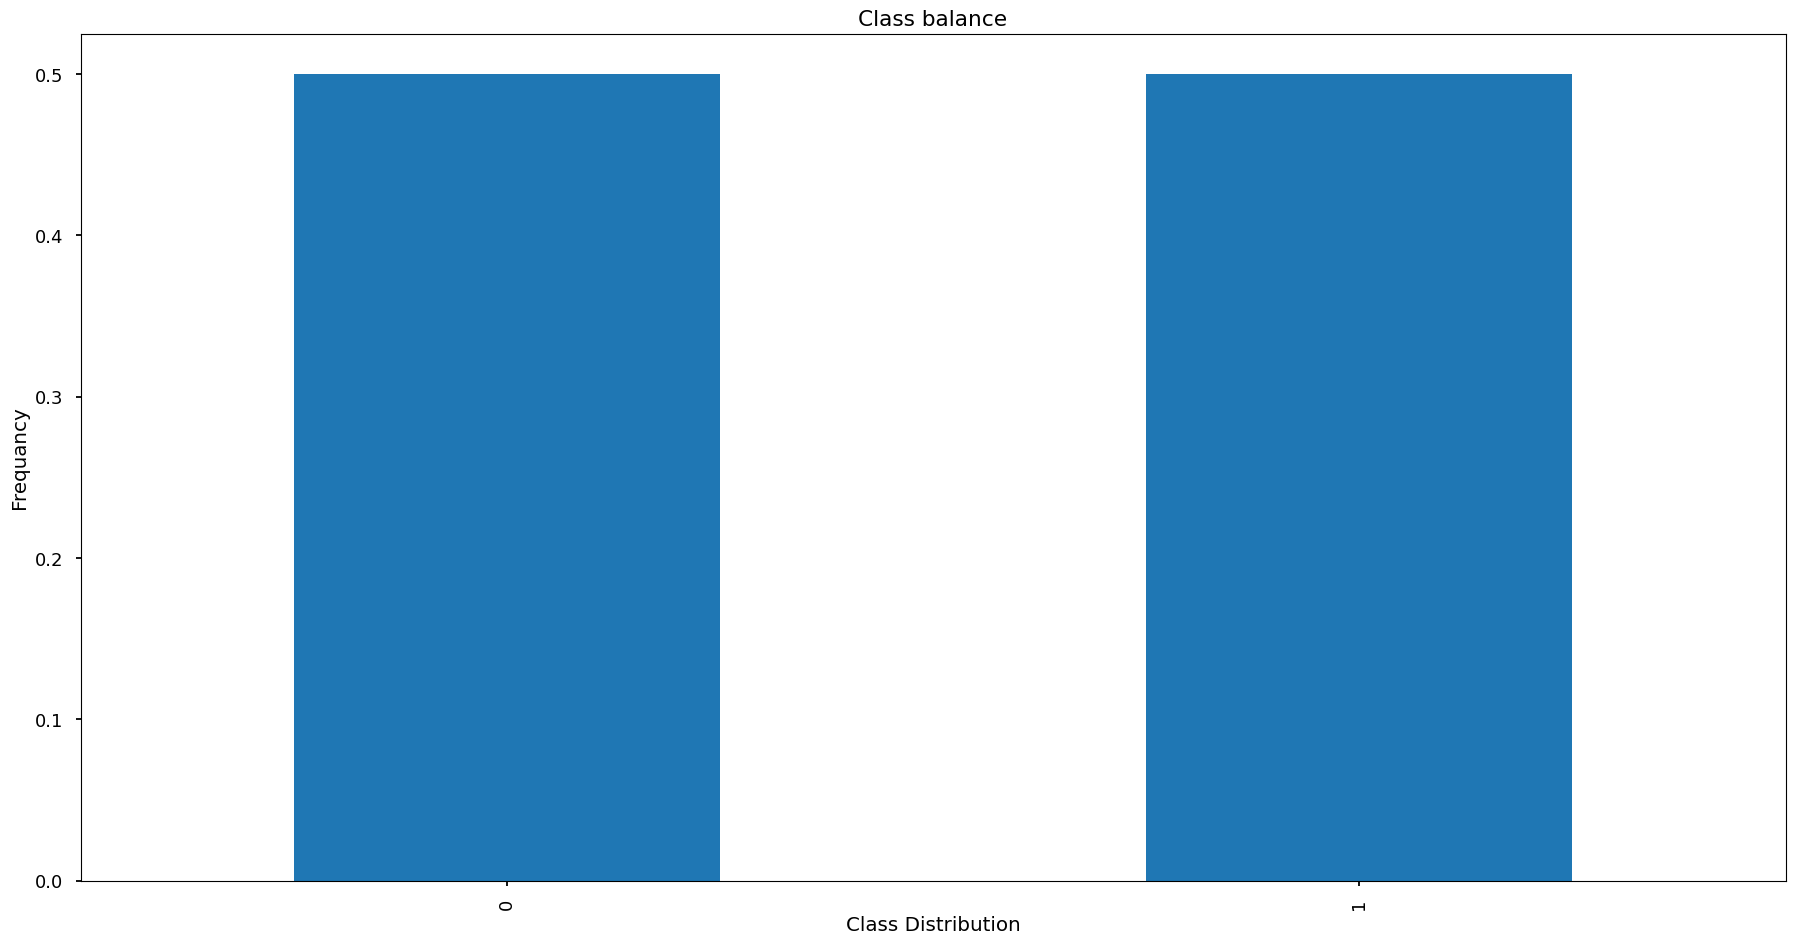

In [15]:
# visualizing the distribution of the class diagram
credit_data['Class'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Class Distribution")
plt.ylabel("Frequancy")
plt.title("Class balance");

In [16]:
# checking the percentage of each class in the dataset
(credit_data.Class.value_counts())/(credit_data.Class.count())

Class
0    0.5
1    0.5
Name: count, dtype: float64

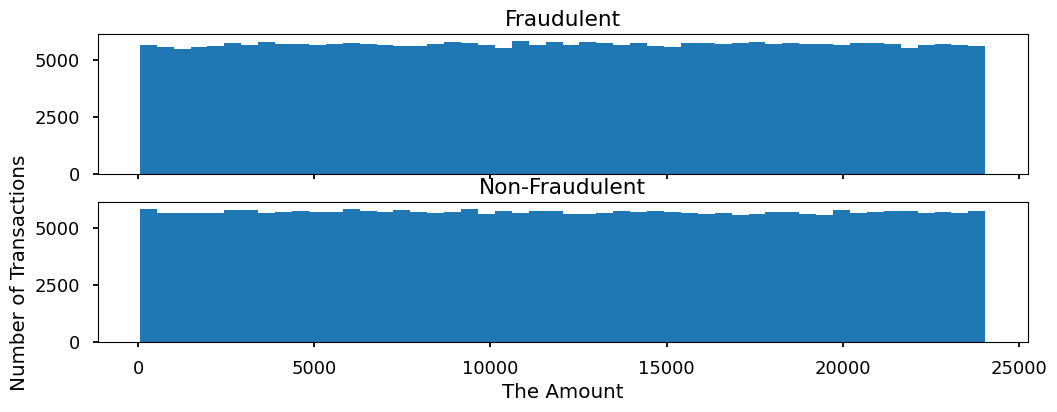

In [17]:
# histrogram for feature Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(credit_data["Amount"][credit_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(credit_data["Amount"][credit_data["Class"] == 0], bins = 50)
ax2.set_title('Non-Fraudulent')

plt.xlabel('The Amount')
plt.ylabel('Number of Transactions')
plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

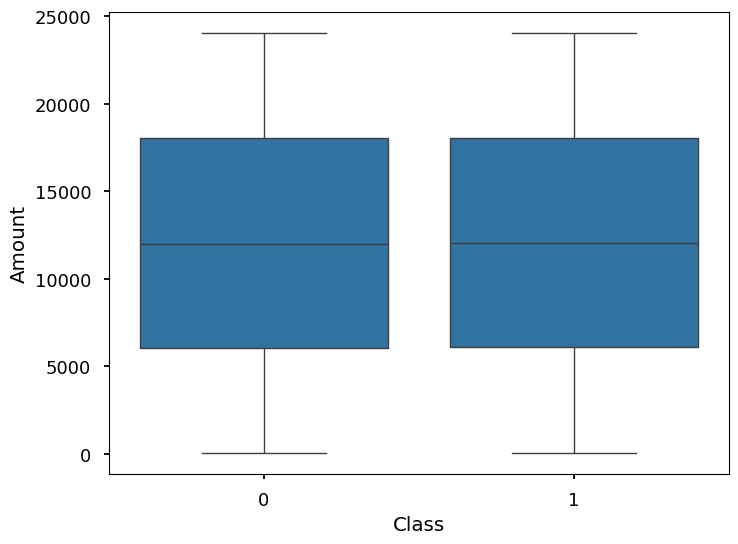

In [18]:
# boxplot for the Amount feature, in order to visualiza the outliers
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(x=credit_data['Class'], y=credit_data['Amount'])

## SPLITTING THE DATA

In [13]:
# splitting data before sampling
# splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = credit_data.drop(['id', 'Class'], axis=1)
Y = credit_data['Class']

split_data1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in split_data1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

# splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
split_data2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in split_data2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [225908 154030 465602 ... 435008 425933 399135] Test: [510747 390373  81077 ... 498586 443122 324570]
Train: [251357 472416 111001 ... 174786 560799  35559] Test: [542797 312194 353612 ... 104977 381292 246625]
Train: [147021 489030 316687 ...  33249 186094  15846] Test: [534820 298025 445615 ... 189362  64919 142584]
Train: [434310 410119 273366 ... 309475  21808 295256] Test: [506571 417439 266334 ... 111681 213082 419599]
Train: [294979 180635 428922 ... 179336 241829  55694] Test: [444595 383082 322502 ... 415342 328251 362999]
Train: [251808 311199  83014 ... 355133 166975  67135] Validation: [133847 195322 332078 ...  14026  94265 201779]
Train: [345294 313998 132424 ... 213200 109201 241832] Validation: [272253 224159 152679 ... 392646  47685 152396]
Train: [ 21162 308401 142096 ...  50180  51461  18176] Validation: [174991  16137 283305 ... 384928 324548 411333]
Train: [204342 194453 330200 ... 416243 365201 351800] Validation: [179403 438590 104801 ...   3870 451621 262

In [14]:
# checking if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.62532461 0.37467539]
[0.5 0.5]
[0.62402617 0.37597383]


In [15]:
# dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(341178, 29)
(341178,)
(113726, 29)
(113726,)
(113726, 29)
(113726,)


In [16]:
# checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

Class
0    213347
1    127831
Name: count, dtype: int64


## OVERSAMPLING

In [23]:
# using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

# oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 215447, 0: 213347})
Shape of X_adasampled: (428794, 29)
Shape of Y_adasampled: (428794,)


In [24]:
# check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49755127 0.50244873]


In [25]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
# joining the oversampled data to a dataframe
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0  0.196894  0.020810 -0.400766  0.113021 -0.199370 -0.736886 -0.160623   
1 -0.377420 -0.234533 -0.313118  0.472103 -0.597757  0.460094 -0.065450   
2  0.385983  0.617816 -0.756279  1.186686  1.084056 -1.158269  0.209002   
3 -0.331078  0.539216 -0.280692 -0.154300  0.400040 -0.699096  0.754739   
4  0.859744 -1.215530  1.371288 -1.008949 -0.438582  0.687417  0.017710   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.006878 -0.120788 -0.525719  ...  0.250243  0.099177 -0.248599  0.062724   
1  0.114492 -0.446178 -0.634457  ...  1.399639  0.255082  0.091926  0.659694   
2 -0.141292 -0.590338 -0.715247  ...  0.165032 -0.041766 -0.603459 -0.583281   
3 -0.165484  1.756085  1.791134  ...  1.159380 -0.284438 -0.191662  0.265968   
4 -0.113165  0.027267  1.153915  ... -0.125507 -0.220742 -0.355116 -0.110676   

        V24       V25       V26       V27       V28    Amount  
0 -0

In [27]:
# merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_credit_data= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
1,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
2,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
3,-0.331078,0.539216,-0.280692,-0.154300,0.400040,-0.699096,0.754739,-0.165484,1.756085,1.791134,...,-0.284438,-0.191662,0.265968,0.445129,-0.294509,-1.005541,0.899601,0.207382,6477.67,0
4,0.859744,-1.215530,1.371288,-1.008949,-0.438582,0.687417,0.017710,-0.113165,0.027267,1.153915,...,-0.220742,-0.355116,-0.110676,1.242794,0.380800,-0.616480,-0.157335,0.025919,1756.84,0


Text(0.5, 1.0, 'Balanced Correlation Matrix')

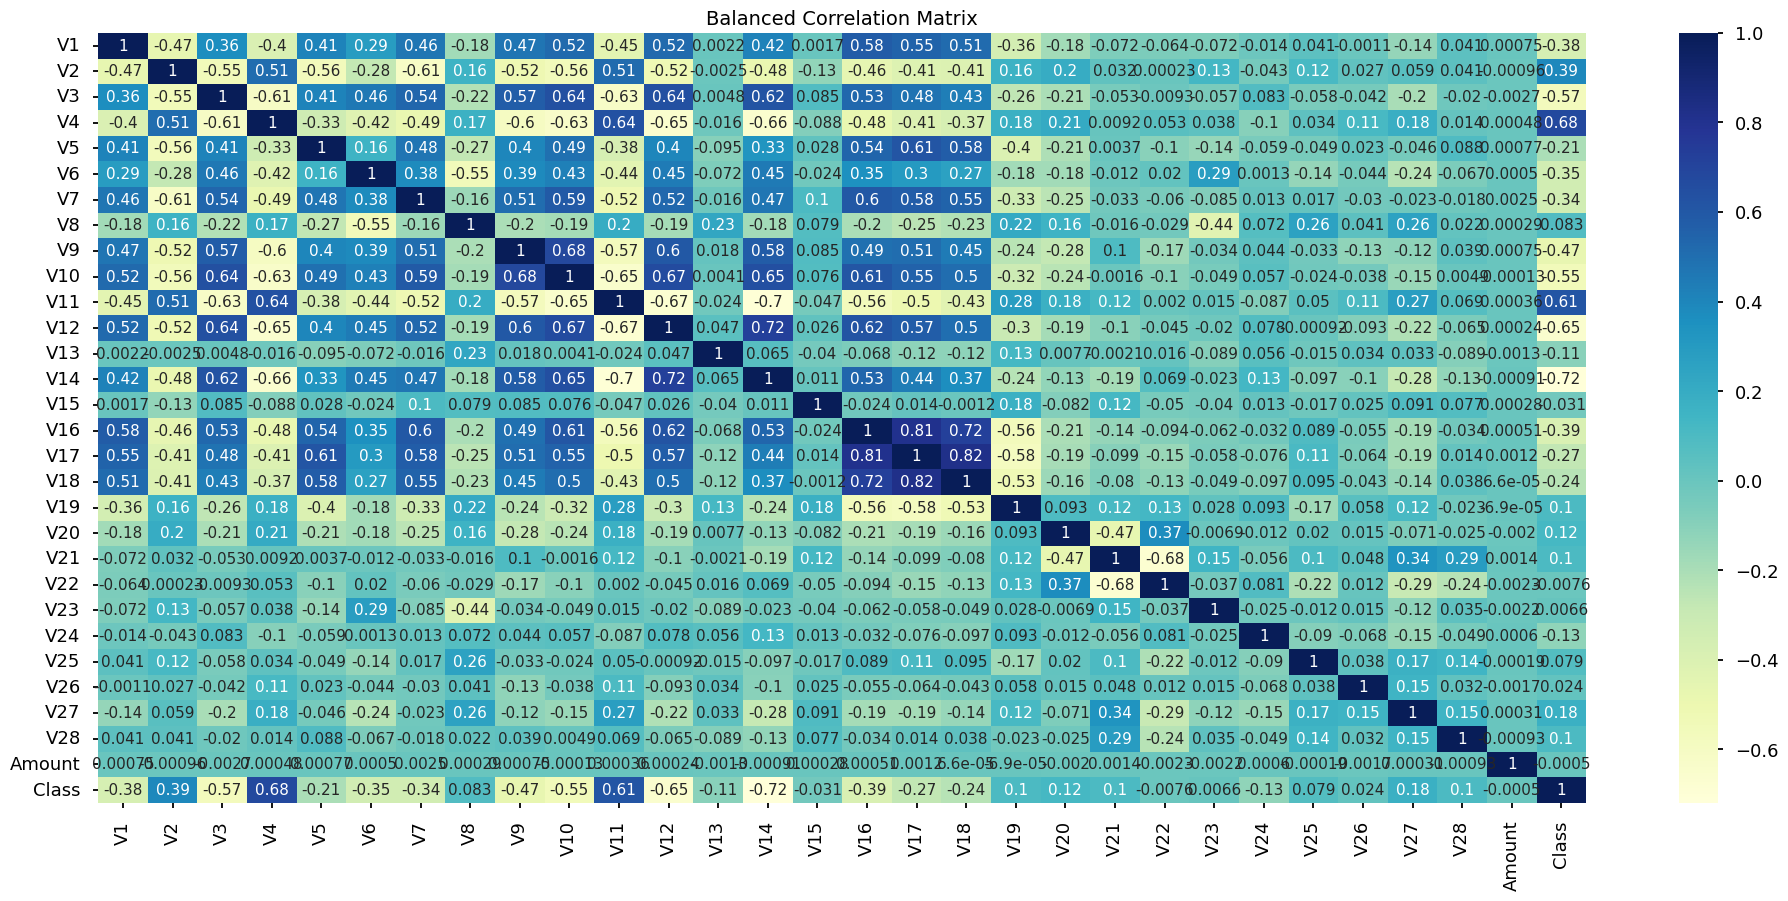

In [28]:
# checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_credit_data.corr()
plt.rcParams['figure.figsize']= (22,11)
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':11}, ax=ax1, annot=True)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

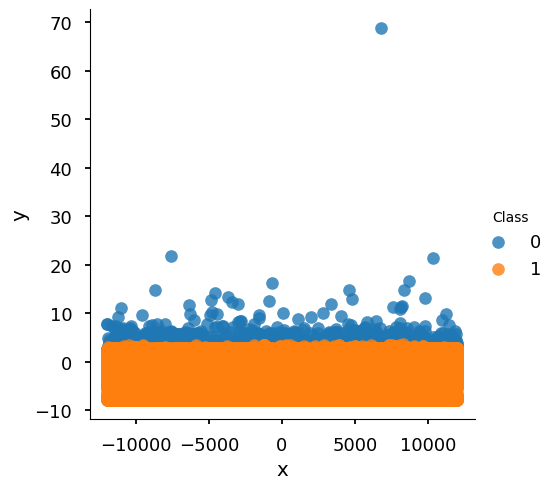

In [29]:
# visualizing balanced train dataset
pca= PCA(n_components=2)
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

In [30]:
# an undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
440873,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
351626,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
327322,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
55058,-0.331078,0.539216,-0.280692,-0.154300,0.400040,-0.699096,0.754739,-0.165484,1.756085,1.791134,...,-0.284438,-0.191662,0.265968,0.445129,-0.294509,-1.005541,0.899601,0.207382,6477.67,0
132573,0.859744,-1.215530,1.371288,-1.008949,-0.438582,0.687417,0.017710,-0.113165,0.027267,1.153915,...,-0.220742,-0.355116,-0.110676,1.242794,0.380800,-0.616480,-0.157335,0.025919,1756.84,0


In [31]:
Train_set.shape

(341178, 30)

In [32]:
# length of Frauds
length_frauds=len(Train_set[Train_set.Class==1])
length_frauds

127831

In [33]:
# taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
440873,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
351626,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
327322,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
451845,-0.812629,1.643804,-1.608390,2.037126,-0.777417,-1.646700,-1.396843,1.053261,-1.758587,-1.754778,...,0.628766,0.156889,0.414185,-1.927243,-0.678371,1.320707,2.123128,1.654559,11454.85,1
390786,-2.313585,3.172742,-2.319236,2.065894,-2.669864,0.299274,-3.309221,-2.241627,-2.729062,-2.777298,...,-4.204549,3.579529,1.789253,0.487979,-1.542600,-1.283606,-4.266479,-2.590024,12332.80,1


In [34]:
# taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
# randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(127831, 30)

In [35]:
# appending both Frauds and Non-Frauds
undersampled_df = pd.concat([fraud_df, non_frauds], ignore_index=True)

# randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
215301,1.930183,-0.780328,-0.044018,-0.860369,0.158938,0.426977,0.261027,-0.157585,0.402965,1.144670,...,-0.213205,-0.148354,-0.072623,-1.775063,0.161268,1.592439,-0.304911,-0.319260,14567.34,0
150390,0.250023,-0.141482,0.334415,-0.950642,0.637703,0.119936,0.766188,-0.139739,0.356140,0.353291,...,-0.220409,-0.691128,0.082698,1.392265,-0.851171,0.213869,0.018896,0.079569,10601.73,0
120262,-0.807842,0.140173,-0.517586,0.296009,-0.138877,-0.695730,-0.371602,-0.244480,0.585107,-0.645935,...,0.241578,0.159100,-0.072832,0.470838,-0.018361,-1.404406,-1.243546,2.425747,12054.93,1
152610,0.229784,-0.370707,1.374376,-1.043350,0.257308,0.866119,0.427580,-0.144285,2.137822,0.377038,...,-0.142732,0.070011,-0.089713,-1.796498,-1.415377,0.822841,-0.516905,-0.601168,16520.86,0
207247,0.866545,-1.192514,0.165938,-0.227728,-0.163791,0.135108,0.458434,-0.198346,1.217973,0.550173,...,0.086124,0.337032,-0.271917,0.224349,-0.847785,0.671422,-0.359318,-0.000484,1609.82,0


In [36]:
# separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(255662, 29)
(255662,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
215301,1.930183,-0.780328,-0.044018,-0.860369,0.158938,0.426977,0.261027,-0.157585,0.402965,1.144670,...,-0.892563,-0.213205,-0.148354,-0.072623,-1.775063,0.161268,1.592439,-0.304911,-0.319260,14567.34
150390,0.250023,-0.141482,0.334415,-0.950642,0.637703,0.119936,0.766188,-0.139739,0.356140,0.353291,...,-0.170991,-0.220409,-0.691128,0.082698,1.392265,-0.851171,0.213869,0.018896,0.079569,10601.73
120262,-0.807842,0.140173,-0.517586,0.296009,-0.138877,-0.695730,-0.371602,-0.244480,0.585107,-0.645935,...,-0.541383,0.241578,0.159100,-0.072832,0.470838,-0.018361,-1.404406,-1.243546,2.425747,12054.93
152610,0.229784,-0.370707,1.374376,-1.043350,0.257308,0.866119,0.427580,-0.144285,2.137822,0.377038,...,-0.325796,-0.142732,0.070011,-0.089713,-1.796498,-1.415377,0.822841,-0.516905,-0.601168,16520.86
207247,0.866545,-1.192514,0.165938,-0.227728,-0.163791,0.135108,0.458434,-0.198346,1.217973,0.550173,...,0.606032,0.086124,0.337032,-0.271917,0.224349,-0.847785,0.671422,-0.359318,-0.000484,1609.82


In [37]:
# converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [38]:
# converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Different numbers of neurons
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],  # 'adam' is generally better for large datasets
    'alpha': [0.0001, 0.05],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    # 'batch_size': [64, 128],  # Optionally, you can also tune the batch size
}

# Initialize the MLP Classifier
mlp = MLPClassifier(max_iter=200)  # You might need to increase max_iter for convergence

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Fit the GridSearchCV on the undersampled data
grid_search.fit(X_us_arr, Y_us_arr)

# Get the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Score: {best_score}")


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score: 0.9618324377546908


c:\Users\Sachith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## ANN MODEL

### EXPERIMENTAL DESIGN

In [40]:
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,100):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred_probs = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_first_pred = (Y_first_pred_probs > 0.5).astype(int)

    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))




[0.9491921672390514, 0.9404311579565904, 0.8045346526939109, 0.9558332213713109, 0.8945215727040444, 0.8954728516667475, 0.9259193262494491, 0.9518396162374984, 0.9504797359878425, 0.9268966813951302, 0.9413057733691687, 0.8732218567975591, 0.8793889222470495, 0.9532958646819055, 0.9124959453528974, 0.9364351731561561, 0.9376293011475911, 0.9470511641459439, 0.8125991483677047, 0.9400134759693929, 0.9514235132596286, 0.9465172568354998, 0.8889453224199566, 0.9462983265228461, 0.945411863956058, 0.9382300131425504, 0.9544875279607169, 0.947008359399294, 0.947867731734513, 0.9558831402923277, 0.9470929281547046, 0.9525930351501326, 0.9449090014756517, 0.9492631158116629, 0.9542466096988589, 0.9181289324589791, 0.9422481292998693, 0.939760147601476, 0.8134610168784294, 0.9520450322045213, 0.9402808043472264, 0.9461150021459032, 0.9171090240914659, 0.9121259000362879, 0.9382951536139558, 0.9444816298836453, 0.9527656536629888, 0.9468020762807493, 0.9562482885333946, 0.8908738352155412, 

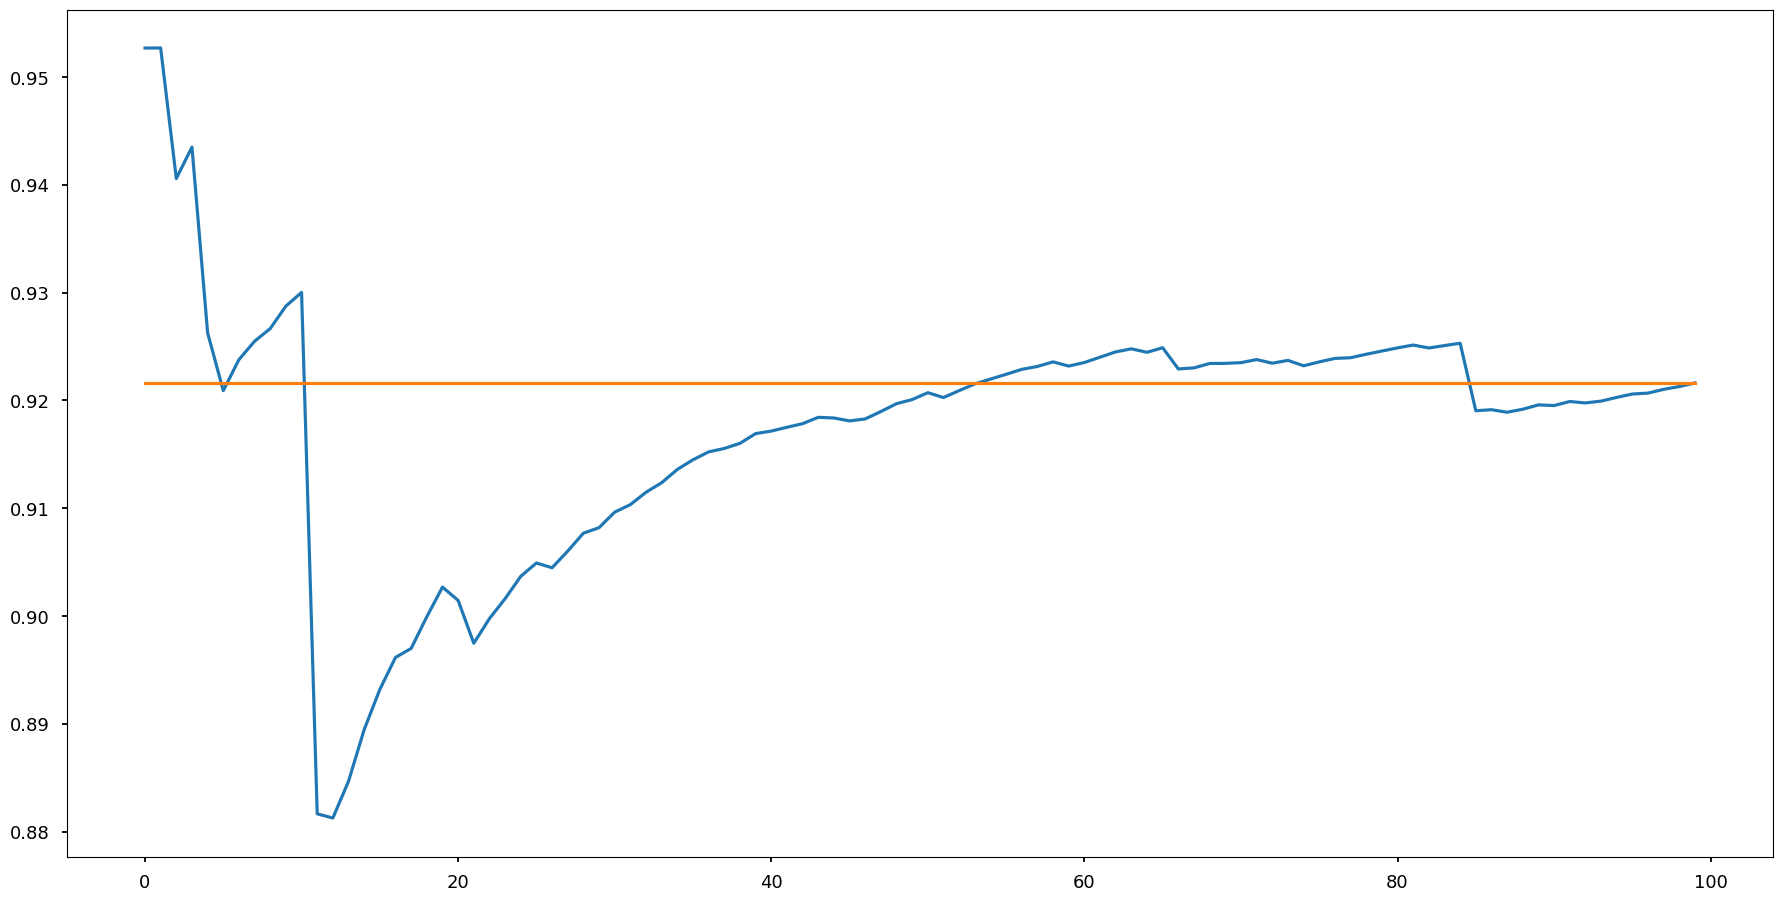

In [41]:
# plotting number of repeats against the average score from those repeats.
# expected: ss the number of repeats increase, the average score stabilizes
f_score_list=[0.9527014294559453, 0.9527093329972363, 0.9163778615444507, 0.9522542096686585, 0.8573294090466193, 0.8941034663763439, 0.941063674831525, 0.9374386699005758, 0.9360907147504415, 0.9475280450494391, 0.942697247706422, 0.3494782608695652, 0.8766084354601386, 0.9290298576876569, 0.9565504502012298, 0.9491171531024466, 0.9436238894917872, 0.9112138816694695, 0.9528120341509689, 0.9549642123166324, 0.8767588597158177, 0.8139559133281892, 0.9501495964060707, 0.9440472261944048, 0.9535427266679851, 0.9357835668363744, 0.8930232558139535, 0.9477386843088476, 0.9542154366582397, 0.9230233368164403, 0.9529474033605152, 0.9318512983373809, 0.9482503248552918, 0.9416328072454554, 0.9553900008975855, 0.9459503920744302, 0.941597029639116, 0.9273241873454381, 0.9339719338787528, 0.9521832160731124, 0.9266063601604028, 0.931910099909509, 0.9318831433980473, 0.9437524704238558, 0.9157900743756062, 0.9058044170103936, 0.9268554026618542, 0.9510402143801264, 0.9547584990868936, 0.9388349067464886, 0.9526103548133915, 0.8973456987527982, 0.954398919405673, 0.9541467411147623, 0.9463939991535419, 0.9468782023129849, 0.9485288083666901, 0.9386591113209819, 0.9481053612883177, 0.9003062594800353, 0.9432265420973259, 0.9541936645068394, 0.9549479898791117, 0.9426316951147734, 0.9039174701638459, 0.9524309167382751, 0.7930514877541491, 0.9295544735583012, 0.9513269523602349, 0.924077661155908, 0.9282266999680757, 0.9440120420001468, 0.8993073333784163, 0.9428006074271778, 0.8861275129011094, 0.9505524460274769, 0.9485554366614536, 0.9287786739781595, 0.9495224106629688, 0.9480088898604585, 0.9484690339768622, 0.9463697720533392, 0.9025618272309889, 0.9437885624827332, 0.9432914593584211, 0.3868204189892629, 0.9272153681482732, 0.8984977316037415, 0.9438253898205354, 0.9554838479640589, 0.9140298903012692, 0.9540047225289772, 0.9076010823050795, 0.9357249904588147, 0.9525377377161259, 0.9505317945236478, 0.9287019424480655, 0.9550274871431105, 0.946837244953827, 0.954504013300202]
f_df=pd.DataFrame(f_score_list)
fscores= f_df.values
final_mean= np.mean(fscores[0:101])
means = list()
for i in range(1,len(f_score_list)+1):
    data = fscores[0:i, 0]
    mean_fscore = np.mean(data)
    means.append(mean_fscore)
# line plot of the values generated in the list
plt.plot(means)
plt.plot([final_mean for x in range(len(means))])
plt.show() #from this plot the point of diminishing returns can be located.

### IMPLEMENTATION

In [42]:
# function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

#### TRAINING MULTI-LAYER PERCEPTRON WITH  1 HIDDEN LAYER

In [43]:
# training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
# model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

# compile Model
Model1.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

# fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 65)                1950      
                                                                 
 dense_201 (Dense)           (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
613/613 - 1s - loss: 46.2658 - accuracy: 0.7039 - val_loss: 1.1560 - val_accuracy: 0.9355 - 1s/epoch - 2ms/step
Epoch 2/30
613/613 - 1s - loss: 4.0962 - accuracy: 0.8160 - val_loss: 7.3403 - val_accuracy: 0.6630 - 1s/epoch - 2ms/step
Epoch 3/30
613/613 - 1s - loss: 4.6790 - accuracy: 0.8439 - val_loss: 1.2120 - val_accuracy: 0.8880 - 812ms/epoch - 1ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


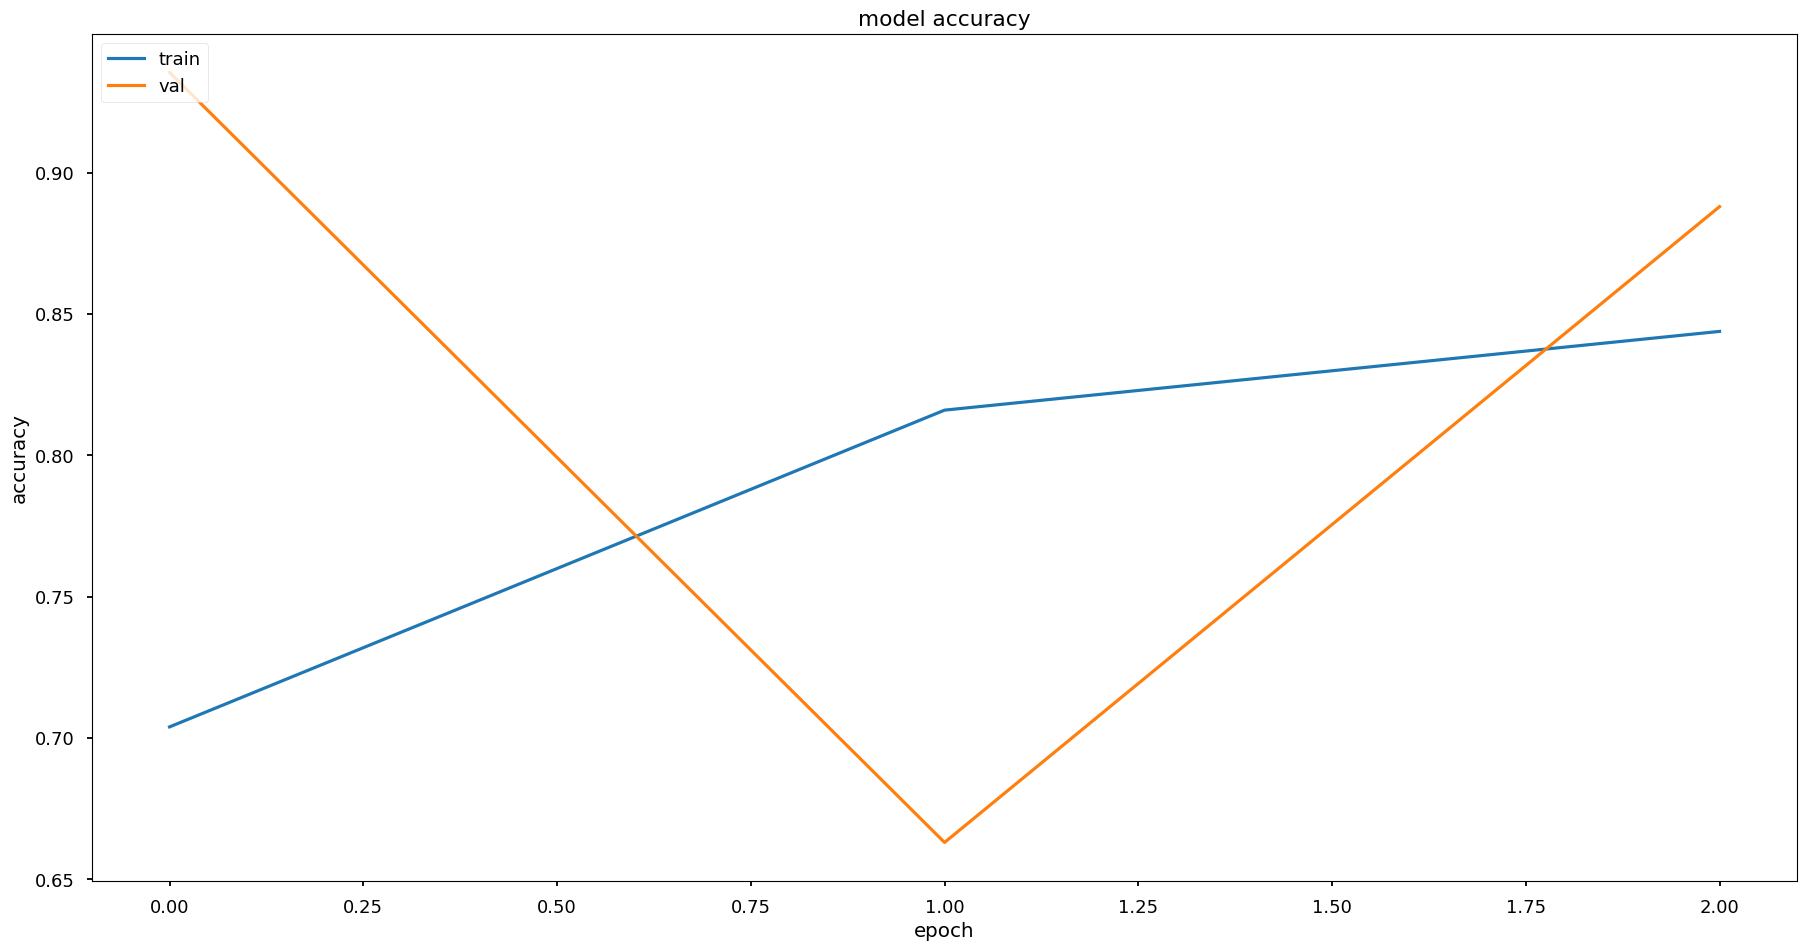

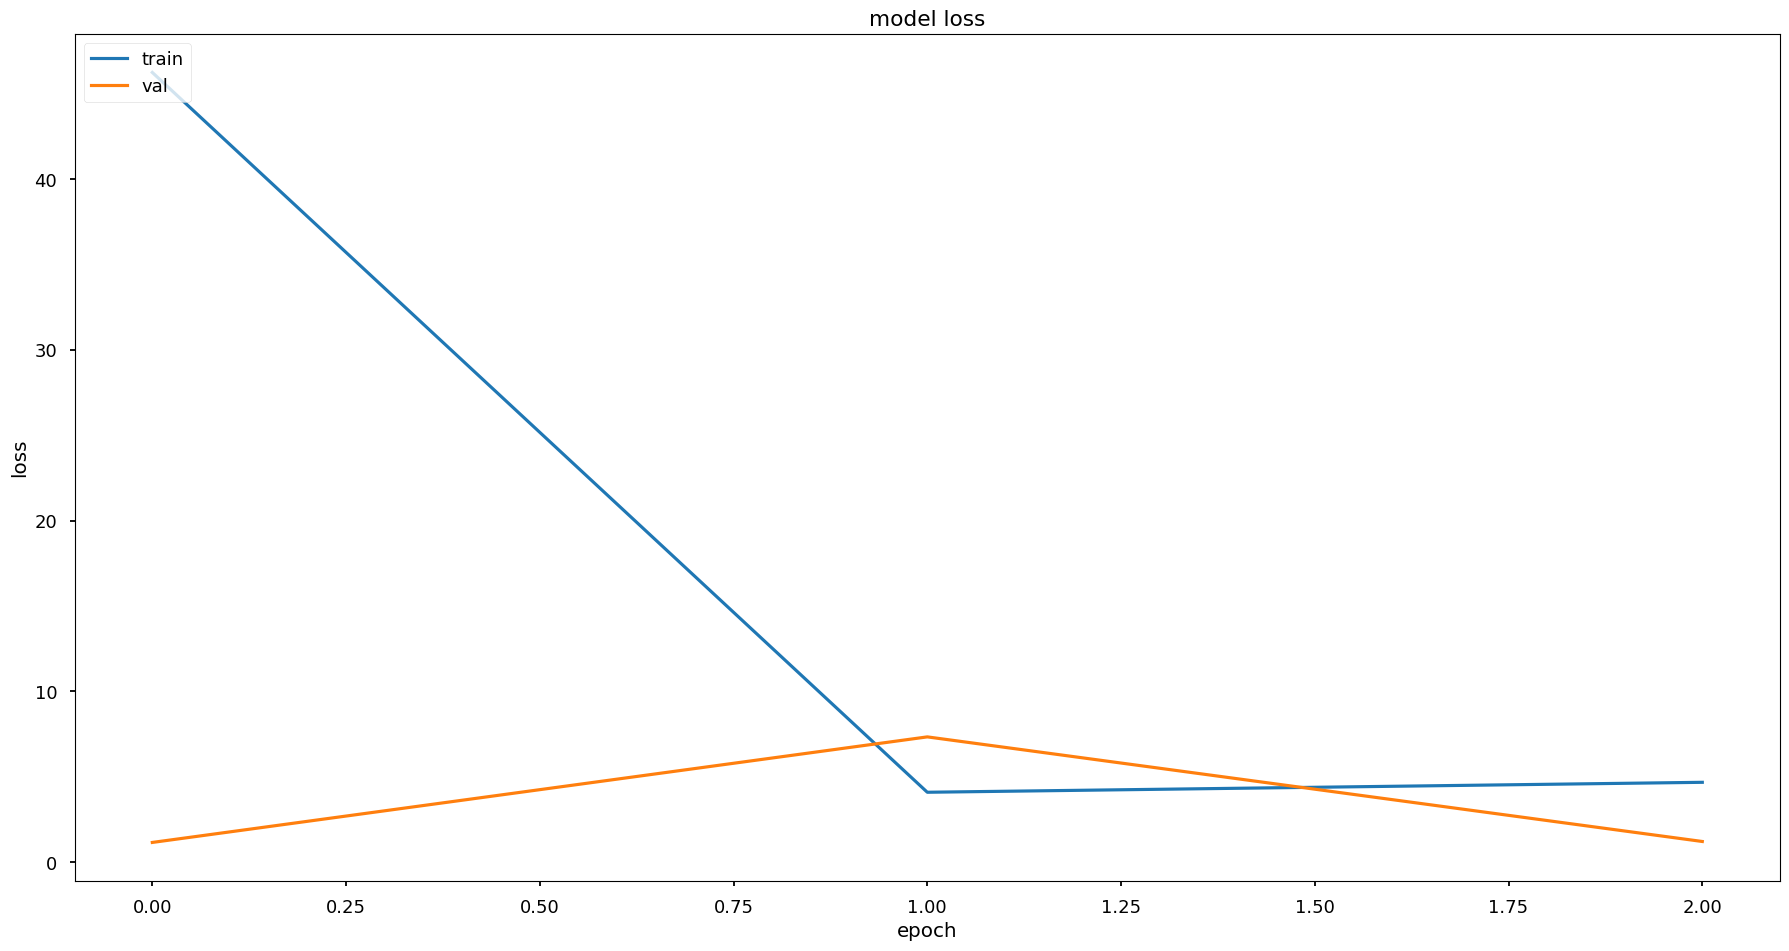

In [44]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
# training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 65)                1950      
                                                                 
 dropout_100 (Dropout)       (None, 65)                0         
                                                                 
 dense_203 (Dense)           (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
613/613 - 2s - loss: 397.0315 - accuracy: 0.5389 - val_loss: 0.3050 - val_accuracy: 0.9248 - 2s/epoch - 3ms/step
Epoch 2/40
613/613 - 1s - loss: 0.7522 - accuracy: 0.6945 - val_loss: 0.2789 - val_accuracy: 0.9456 - 995ms/epoch - 2ms/step
Epoch 3/40
613/613 - 1s - loss: 0.6

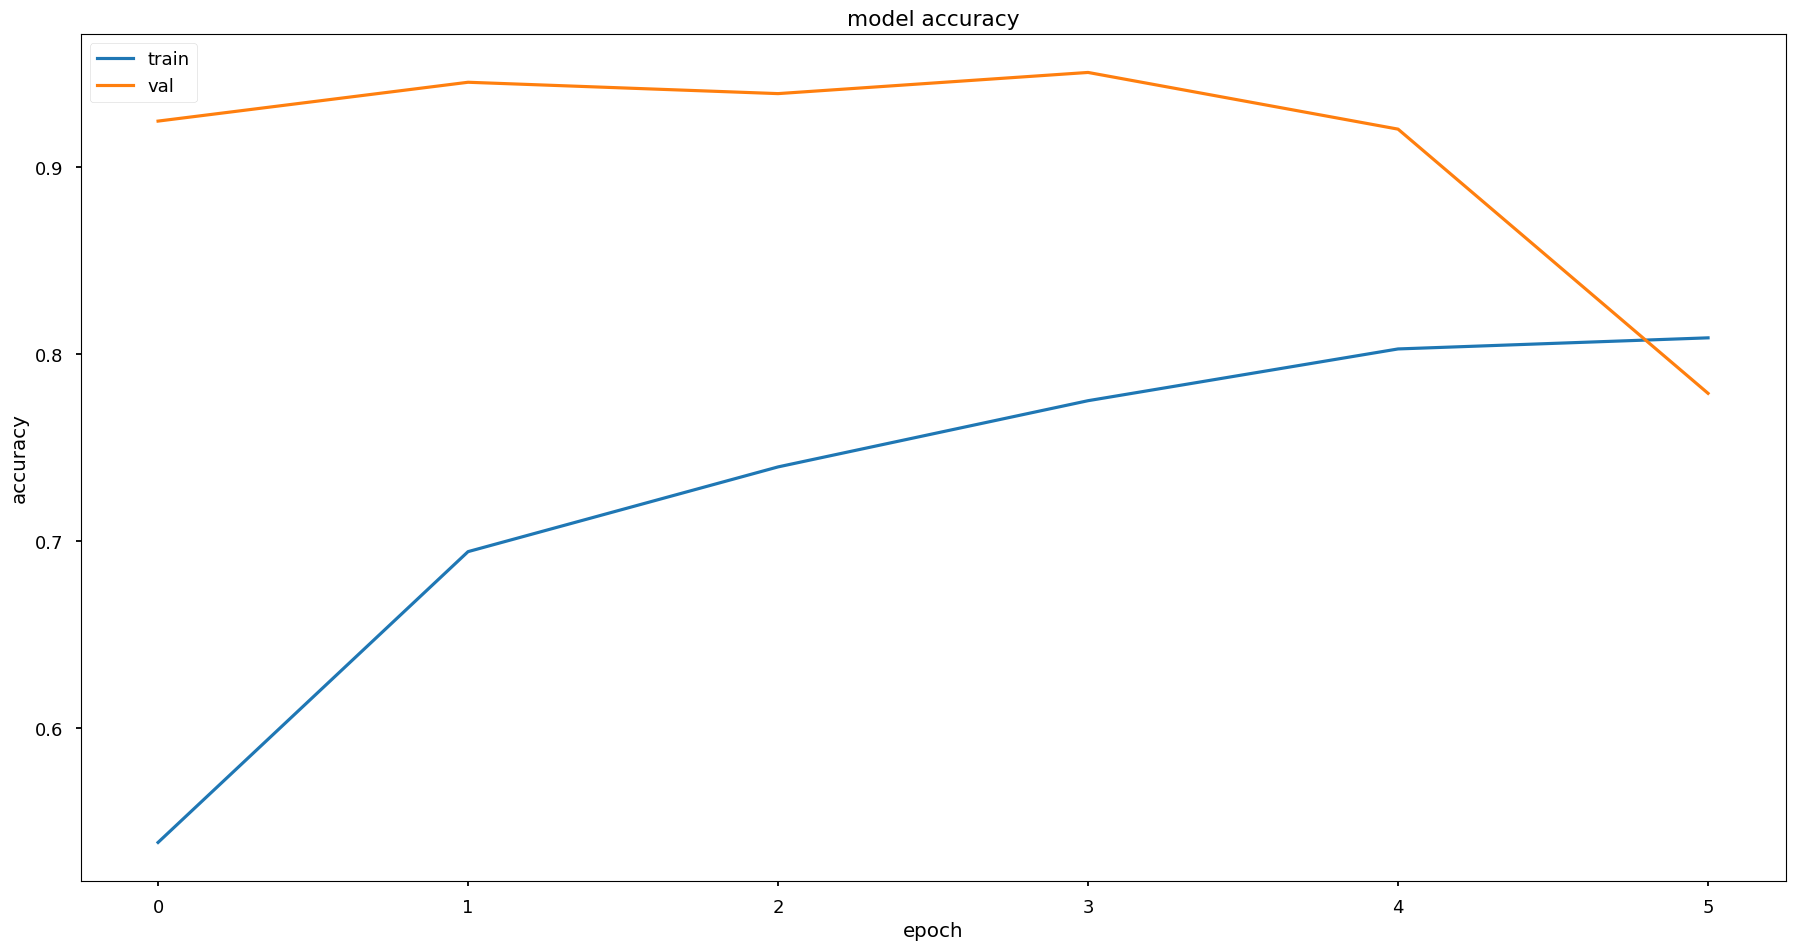

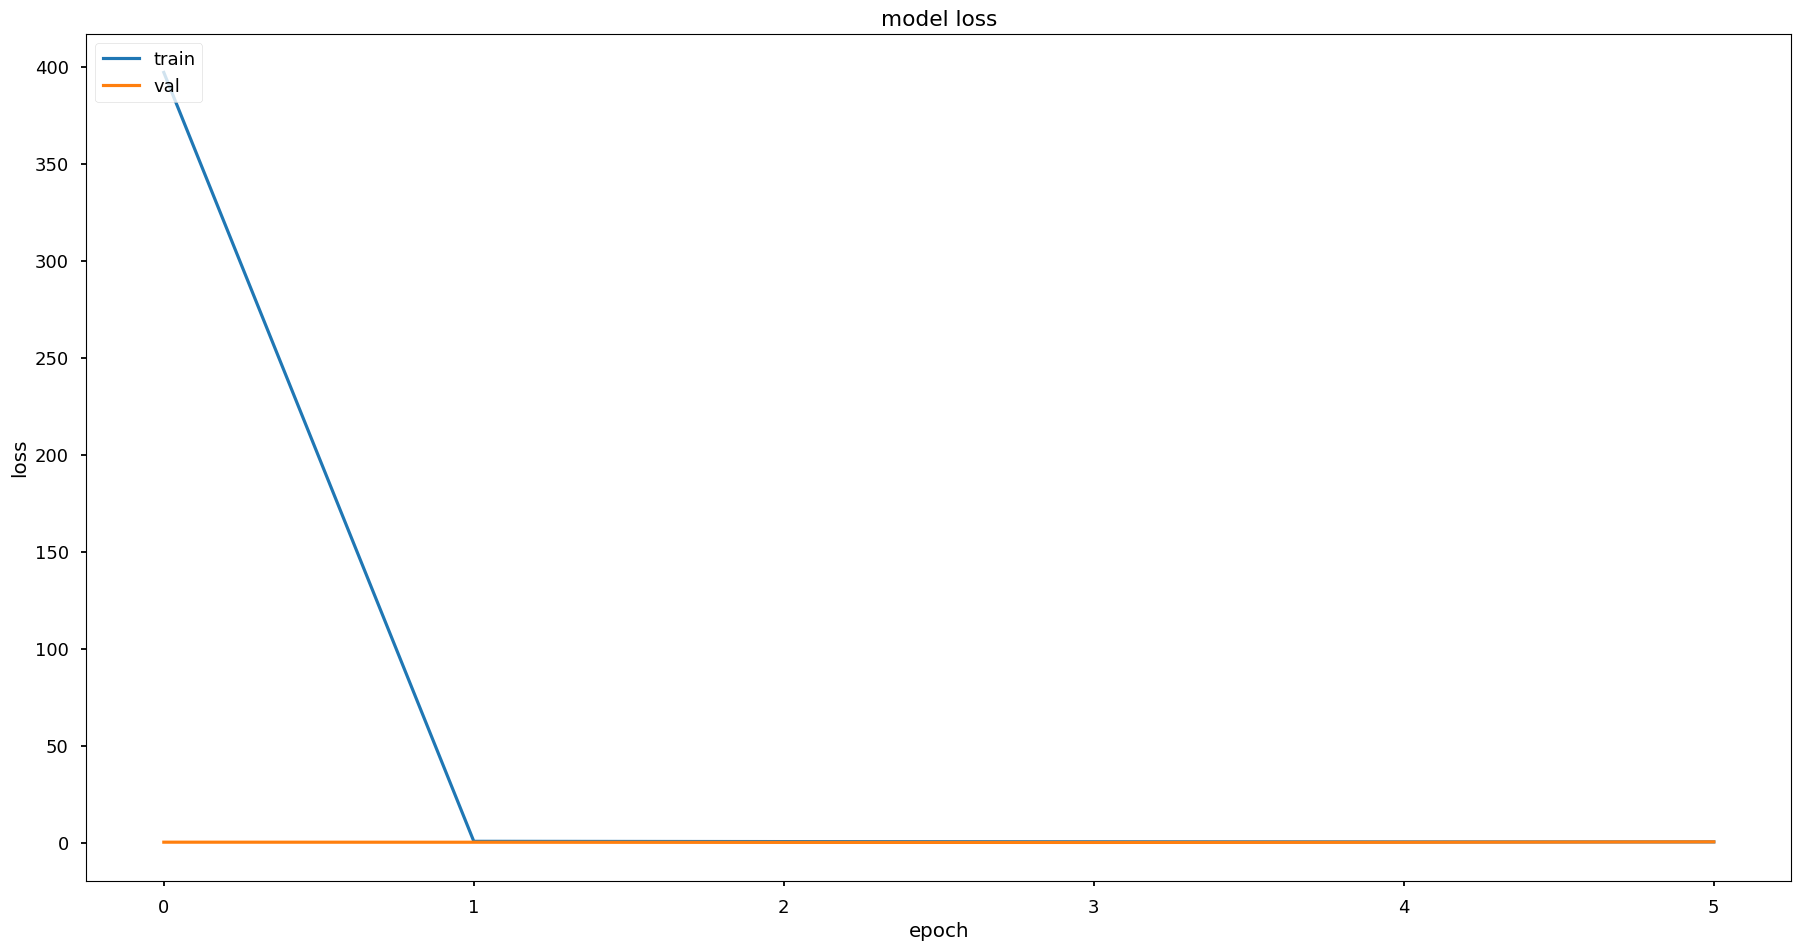

In [46]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
Y_pred_probs = Model1_drop.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred_cls = (Y_pred_probs > 0.5).astype(int)
print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls, zero_division=1)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))

conf_matrix = confusion_matrix(Ytest_arr, Y_pred_cls)
conf_matrix

3554/3554 [==============================] - 3s 778us/step - loss: 0.1845 - accuracy: 0.9376
Accuracy Model1 (Dropout): 0.9375868439674377
Recall_score: 0.8815222552450627
Precision_score: 0.992849644462931
F-score: 0.9338798323241733


array([[56502,   361],
       [ 6737, 50126]], dtype=int64)

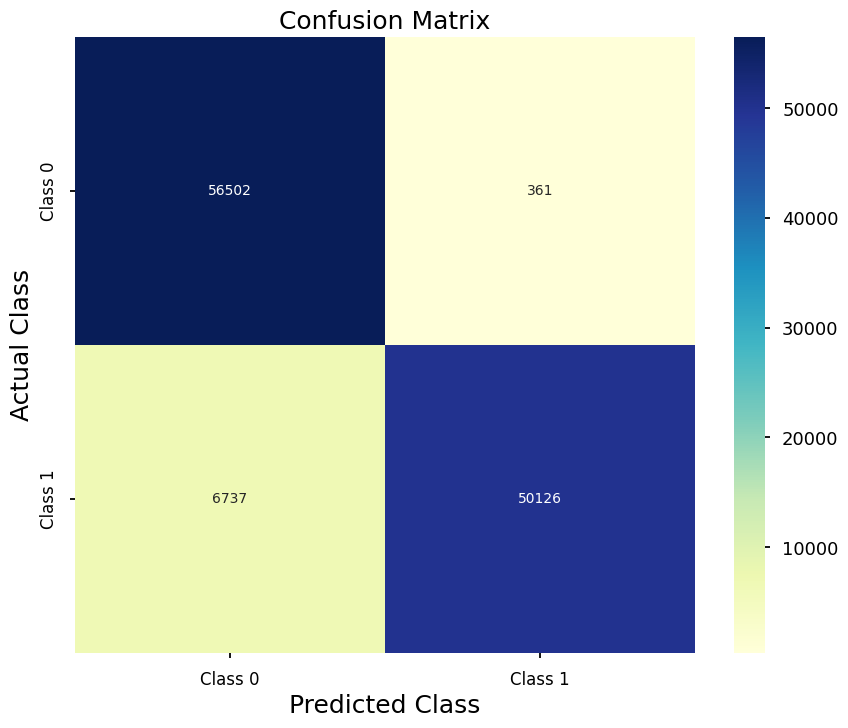

In [48]:
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# labels, title and ticks
label_font = {'size':'18'}  # adjust to fit
plt.xlabel('Predicted Class', fontdict=label_font)
plt.ylabel('Actual Class', fontdict=label_font)
plt.title('Confusion Matrix', fontdict=label_font)
tick_marks = np.arange(len(['Class 0', 'Class 1'])) + 0.5
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=0, fontsize=12)
plt.yticks(tick_marks, ['Class 0', 'Class 1'], rotation=90, fontsize=12)

plt.show()

3554/3554 [==============================] - 2s 615us/step


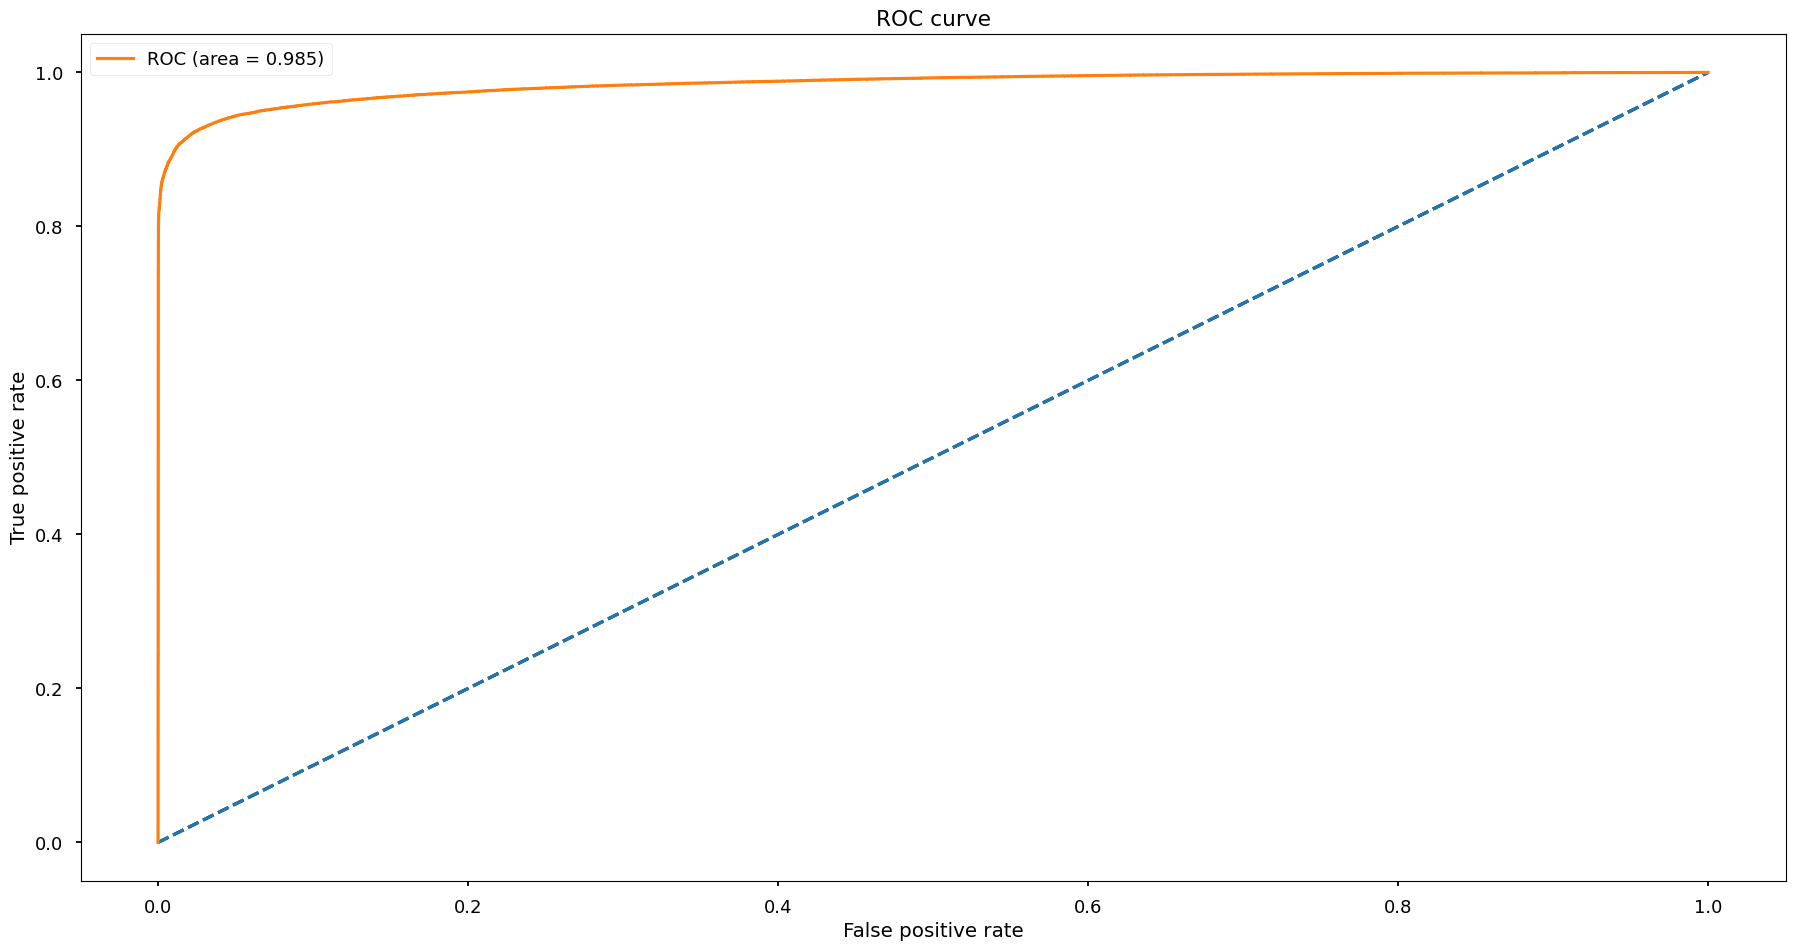

In [49]:
# plotting ROC curve
Y_pred_prob = Model1_drop.predict(Xtest_arr).ravel()

fpr_model1, tpr_model1, thresholds_model1 = roc_curve(Ytest_arr, Y_pred_prob, pos_label=1)
auc_model1 = roc_auc_score(Ytest_arr, Y_pred_prob)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC (area = {:.3f})'.format(auc_model1))

# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

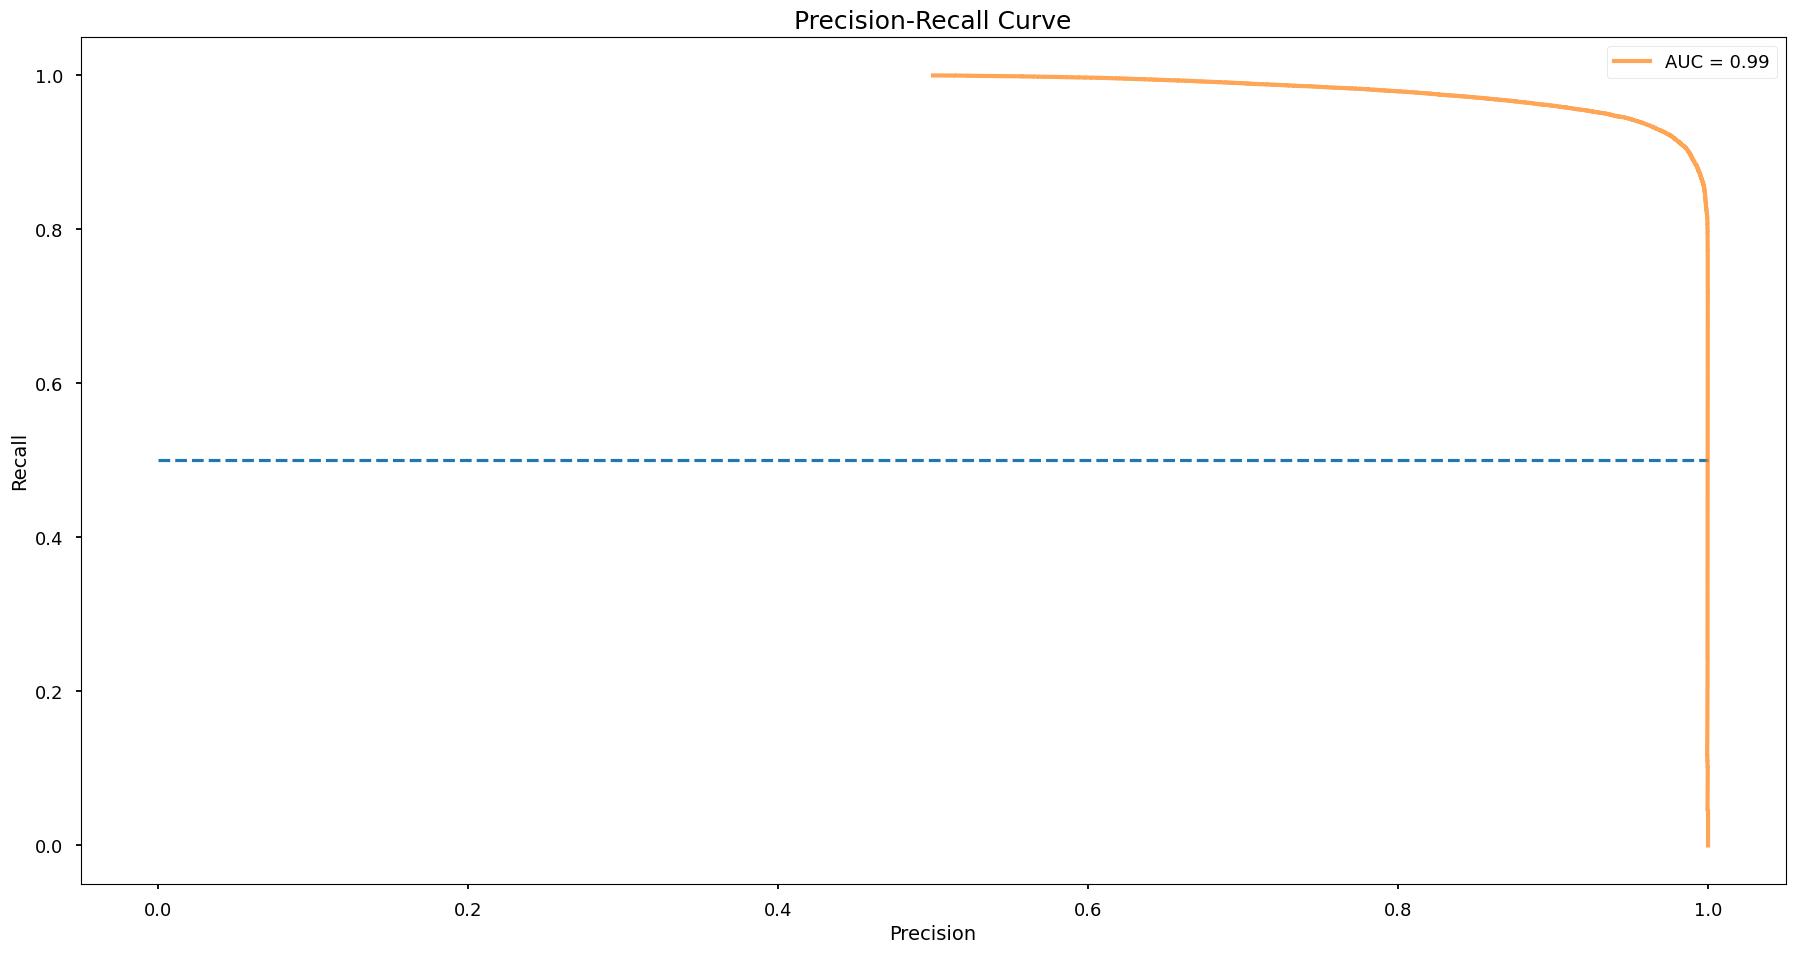

In [50]:
# calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

# Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [51]:
# training Multi-layer Perceptron with single hidden layer for 60 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred_probs = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_first_pred = (Y_first_pred_probs > 0.5).astype(int)

    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

[0.9488421205942325, 0.9538445158199208, 0.9107789984988, 0.9251599688049086, 0.9325467685087366, 0.9279283508106535, 0.9563004657686982, 0.9382239382239382, 0.9448732376893016, 0.9267887166075098, 0.9050569581280788, 0.9408258912096834, 0.9523869950238836, 0.9502023003136791, 0.9526461893431394, 0.947516204611135, 0.924325394207297, 0.891303500428783, 0.908296441096993, 0.9482150467433784, 0.955697846236511, 0.9166342218466009, 0.8890191137546759, 0.8740671826441537, 0.9507330794764881, 0.9509043459349741, 0.9395754751867466, 0.931325853631149, 0.9512197334639705, 0.9485644627196973, 0.9560360775011285, 0.9369491274085471, 0.8880962386029376, 0.931003625561593, 0.9393398173253995, 0.9371513024200998, 0.9303319005627686, 0.9269632379131283, 0.9543747786043216, 0.9544349884764731, 0.9419969413889042, 0.9476821854069921, 0.9348718661661801, 0.9191624148853441, 0.8592117139705145, 0.9147564401695157, 0.9387533576185745, 0.9513812854596292, 0.9447123111539698, 0.7813799014356118, 0.9356304

In [52]:
# training Multi-layer perceptron with 2 hidden layers
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=22,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(100, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
Model2.add(Dropout(0.5))
Model2.add(Dense(100, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
613/613 - 2s - loss: 123.7708 - accuracy: 0.5010 - val_loss: 0.7139 - val_accuracy: 0.3760 - 2s/epoch - 4ms/step
Epoch 2/40
613/613 - 2s - loss: 0.8604 - accuracy: 0.5021 - val_loss: 0.7133 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 3/40
613/613 - 2s - loss: 0.7264 - accuracy: 0.5022 - val_loss: 0.7118 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 4/40
613/613 - 2s - loss: 0.7174 - accuracy: 0.5024 - val_loss: 0.7093 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 5/40
613/613 - 2s - loss: 0.7146 - accuracy: 0.5025 - val_loss: 0.7090 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 6/40
613/613 - 2s - loss: 0.7137 - accuracy: 0.5017 - val_loss: 0.7093 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 7/40
613/613 - 2s - loss: 0.7105 - accuracy: 0.5020 - val_loss: 0.7068 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 8/40
613/613 - 2s - loss: 0.7112 - accuracy: 0.5022 - val_loss: 0.7061 - val_accuracy: 0.3760 - 2s/epoch - 3ms/step
Epoch 9/40
613/613 - 2

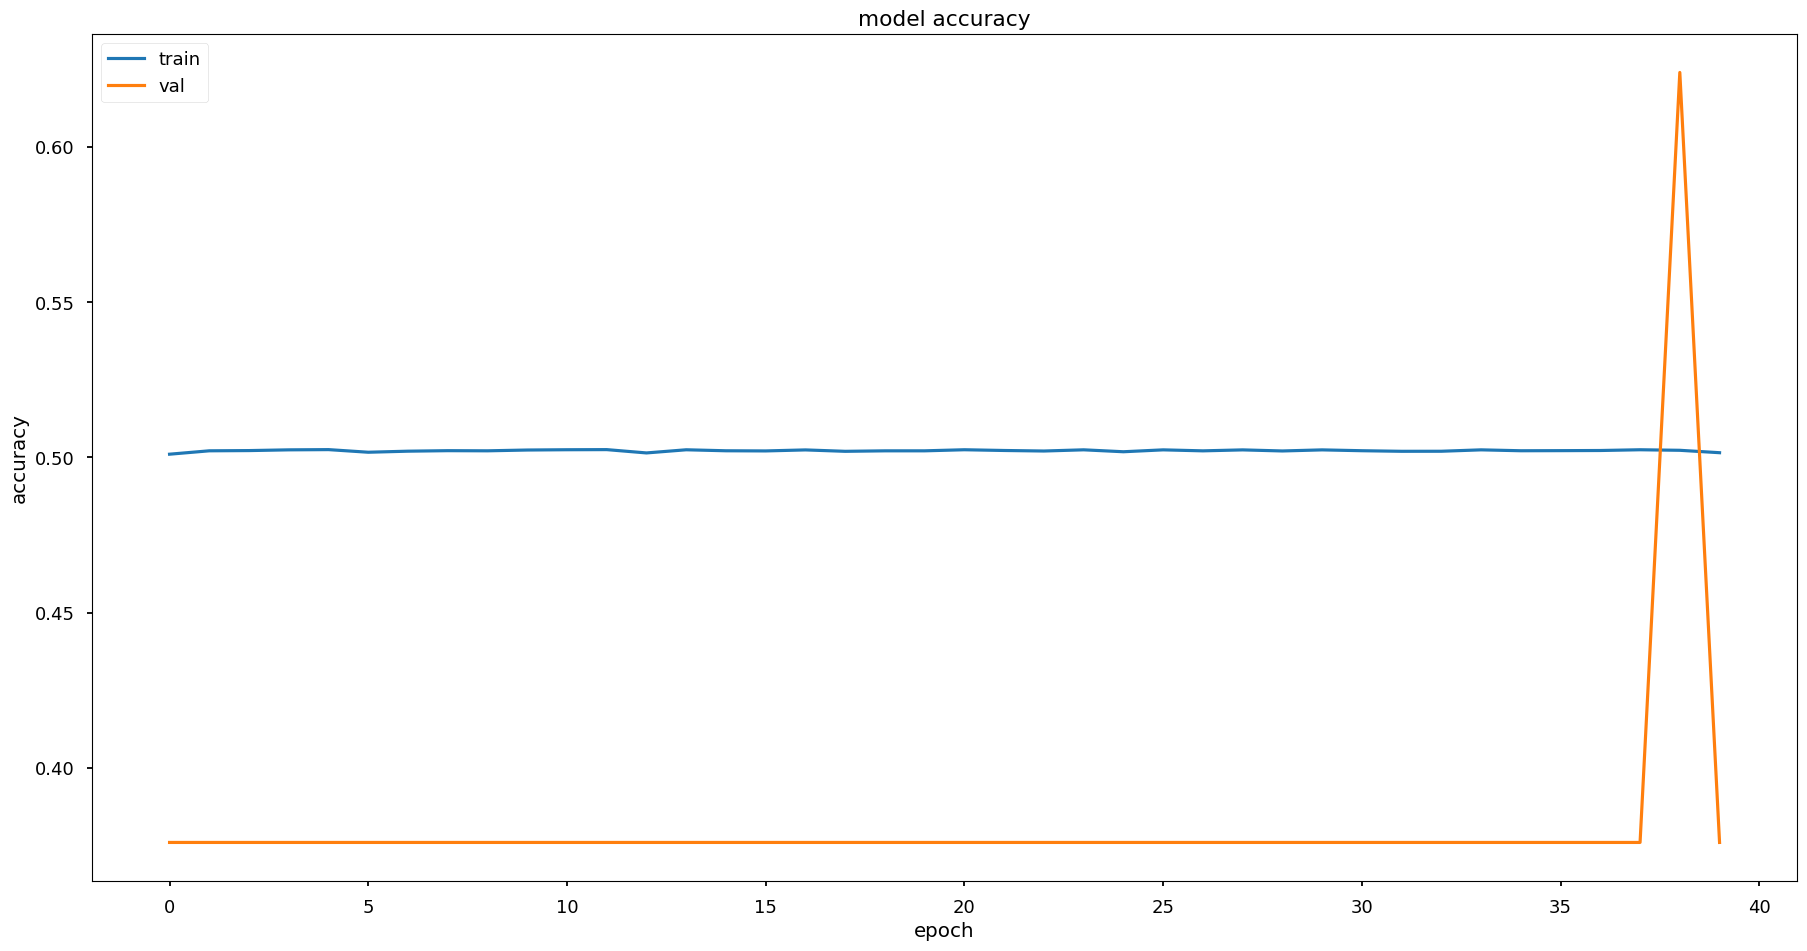

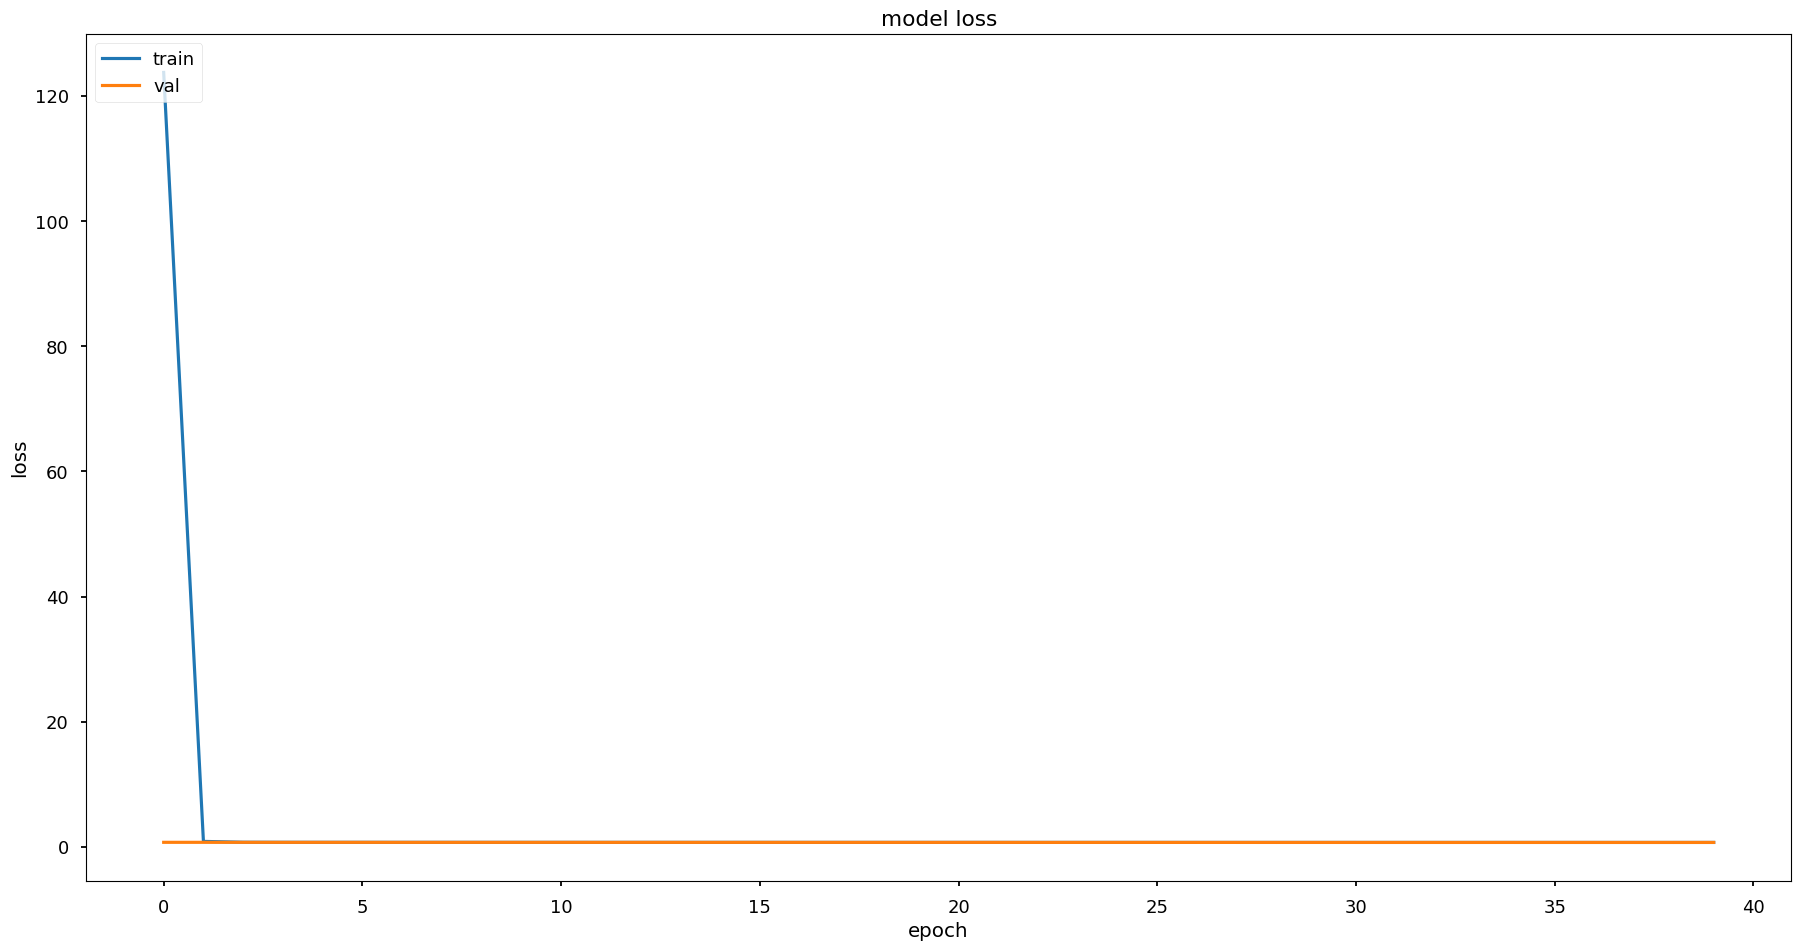

In [53]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))

Y_pred_probs = Model2.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred_cls = (Y_pred_probs > 0.5).astype(int)
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))

conf_matrix = confusion_matrix(Ytest_arr, Y_pred_cls)
conf_matrix

3554/3554 [==============================] - 3s 728us/step - loss: 0.6944 - accuracy: 0.5000
Accuracy MLP: 0.5
3554/3554 [==============================] - 3s 726us/step - loss: 0.6944 - accuracy: 0.5000
Loss value: 0.6943732500076294
Recall_score: 1.0
Precision_score: 0.5
F-score: 0.6666666666666666


array([[    0, 56863],
       [    0, 56863]], dtype=int64)

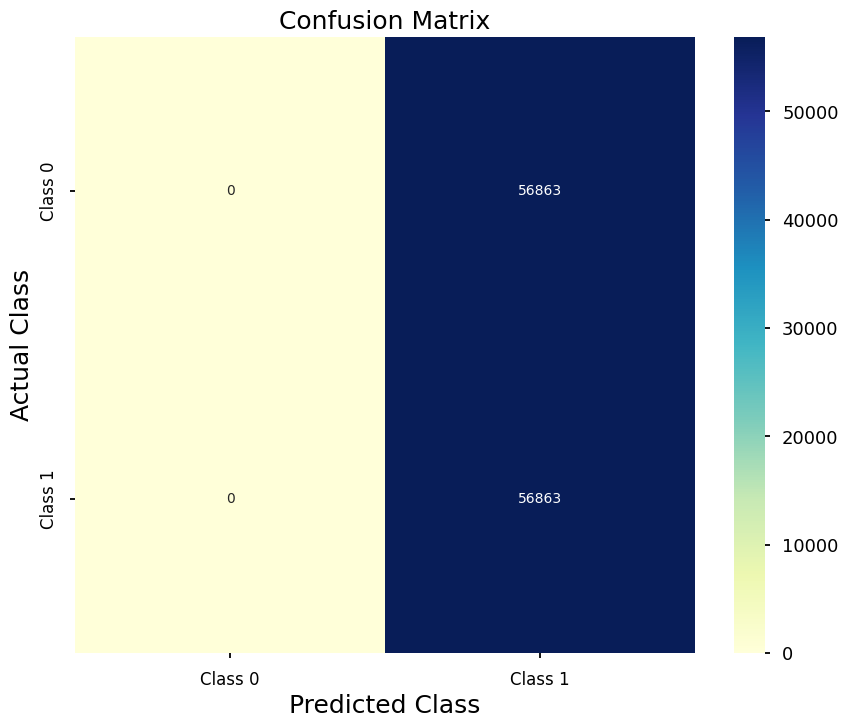

In [55]:
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# labels, title and ticks
label_font = {'size':'18'}  # adjust to fit
plt.xlabel('Predicted Class', fontdict=label_font)
plt.ylabel('Actual Class', fontdict=label_font)
plt.title('Confusion Matrix', fontdict=label_font)
tick_marks = np.arange(len(['Class 0', 'Class 1'])) + 0.5
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=0, fontsize=12)
plt.yticks(tick_marks, ['Class 0', 'Class 1'], rotation=90, fontsize=12)

plt.show()

3554/3554 [==============================] - 2s 618us/step


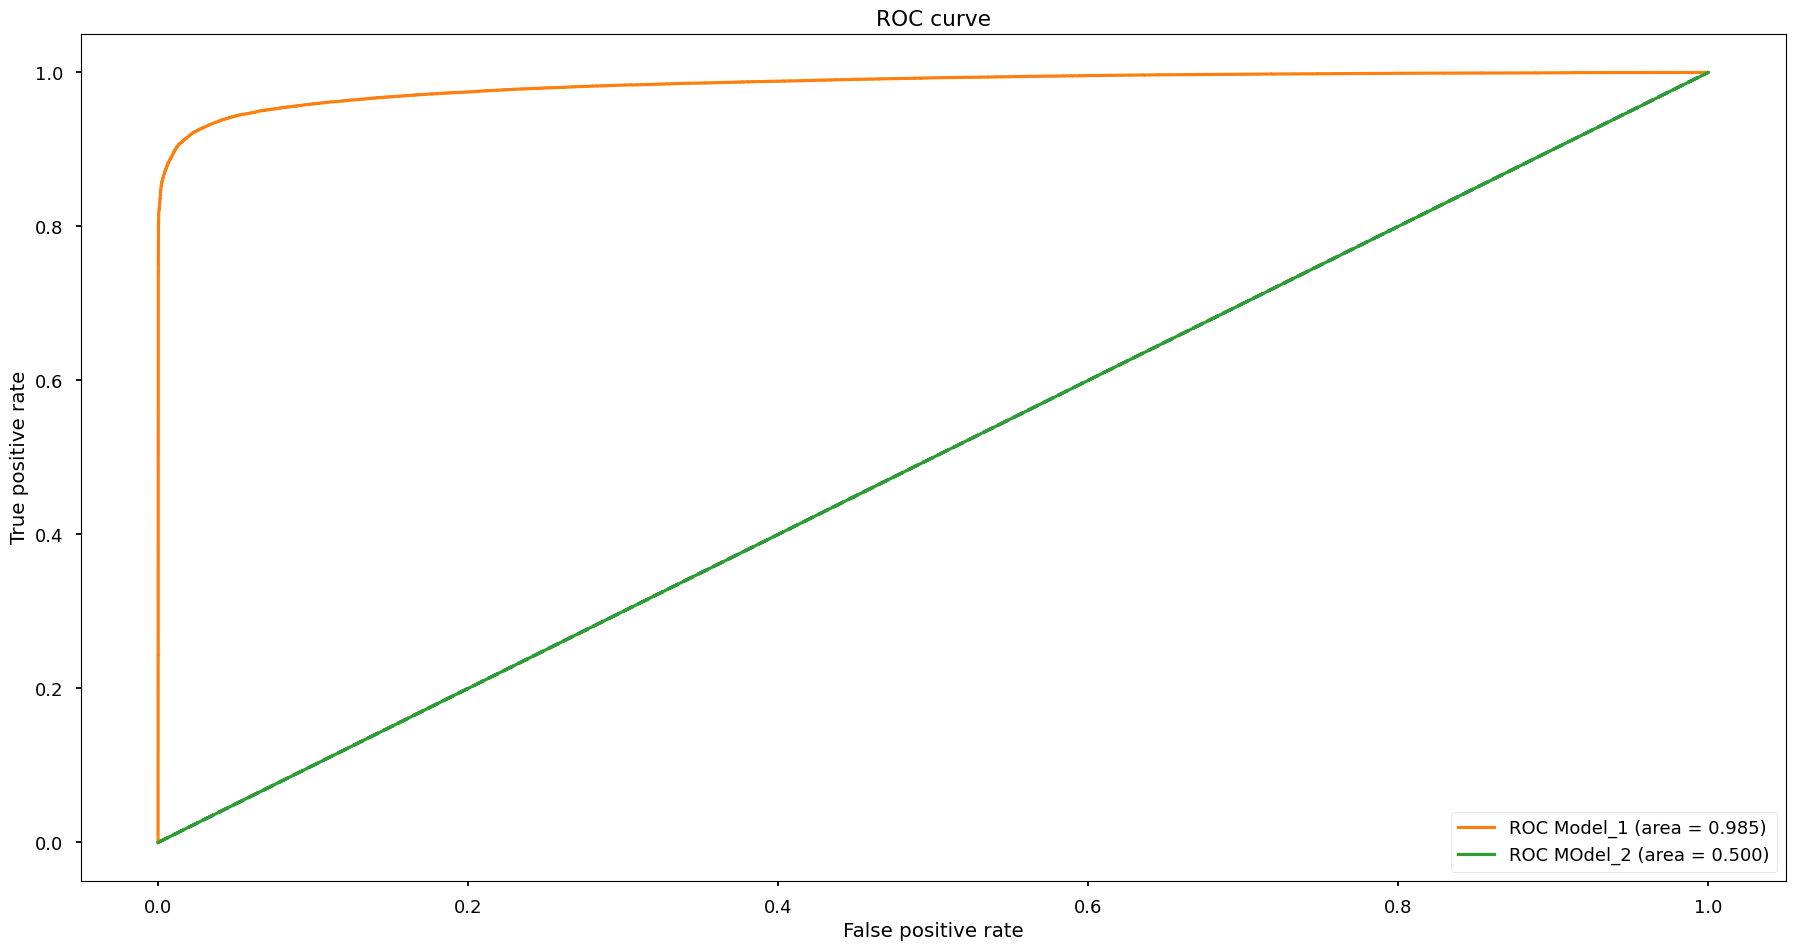

In [56]:
# comparing the ROC and PR curves before iterating the model
Y_pred_prob2 = Model2.predict(Xtest_arr).ravel()

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(Ytest_arr, Y_pred_prob2, pos_label=1)
auc_model2 = roc_auc_score(Ytest_arr, Y_pred_prob2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC Model_1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

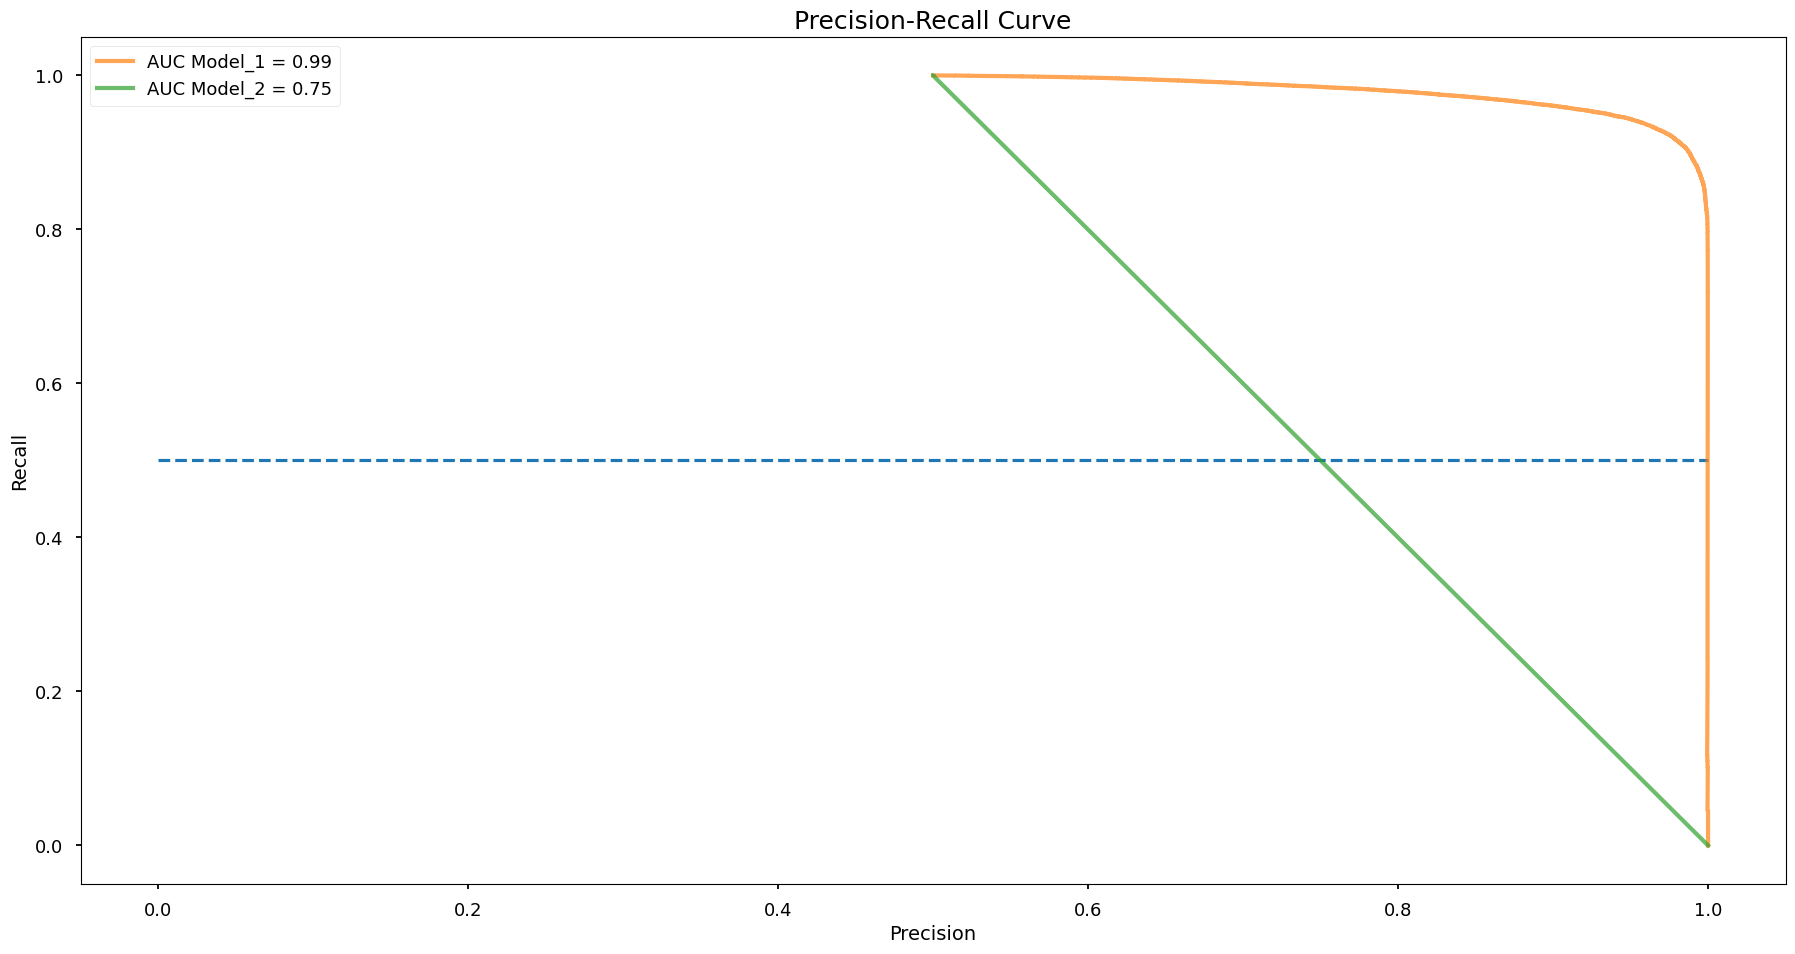

In [57]:
# calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

# auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

#### TRAINING MULTI-LAYER PERCEPTRON WITH 2 HIDDEN LAYERS

In [58]:
# iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):

    Second_Model = Sequential()
    Second_Model.add(Dense(100, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu',kernel_regularizer=l2(0.0001)))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(100, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred_probs = Second_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_second_pred = (Y_second_pred_probs > 0.5).astype(int)

    f_score= f1_score(Ytest_arr,Y_second_pred)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)


[0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.09591998729957137, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.13389286746035367, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3166406343866394, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.6666666666666666, 0.045154055999062775, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
FScore Mean: 0.387637903530205
----------------------------------------------------------------------------------------


### RESULT ANALYSIS

* If the Null Hypothesis is accepted, this means there is no difference between the datasets and the change of number of hidden layers does not affect the performance of the model.
* If the Null Hypothesis is rejected, this means there is significant difference between the datasets and the change of number of hidden layers affects the performance of the model.

In [59]:
# comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.9292078040128949
----------------------------------------
Model-2
---------
Average F-Score: 0.387637903530205


In [60]:
# comparing the Standard Deviation for F-scores generated after iterations
fscore_df1=pd.DataFrame(f_scorelist1)

print('Model-1')
print('------------------')
print('F_score SD: ' + str(fscore_df1.std()))

print('-'*40)

fscore_df2=pd.DataFrame(f_scorelist2)

print('Model-2')
print('------------------')
print('F_score SD: ' + str(fscore_df2.std()))

Model-1
------------------
F_score SD: 0    0.030671
dtype: float64
----------------------------------------
Model-2
------------------
F_score SD: 0    0.324814
dtype: float64


<Axes: >

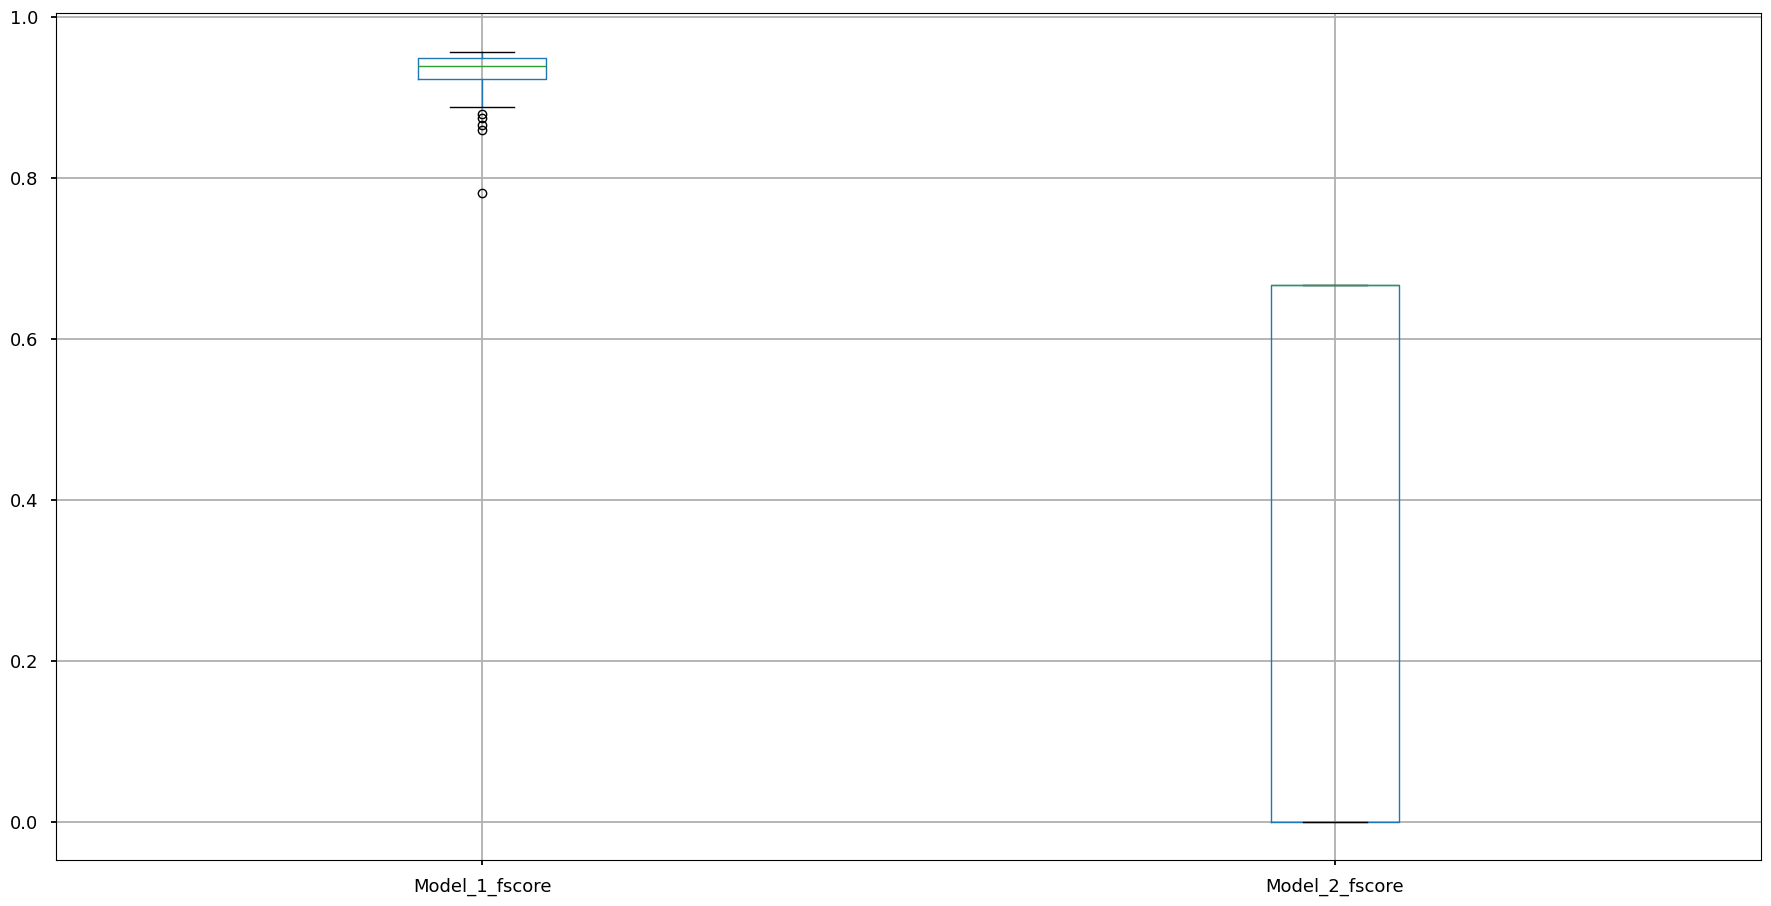

In [61]:
# visualize the results using a boxplot()

results_fscore= pd.concat([fscore_df1, fscore_df2], axis=1)
results_fscore.columns = ['Model_1_fscore', 'Model_2_fscore']

results_fscore.boxplot()

array([[<Axes: title={'center': 'Model_1_fscore'}>,
        <Axes: title={'center': 'Model_2_fscore'}>]], dtype=object)

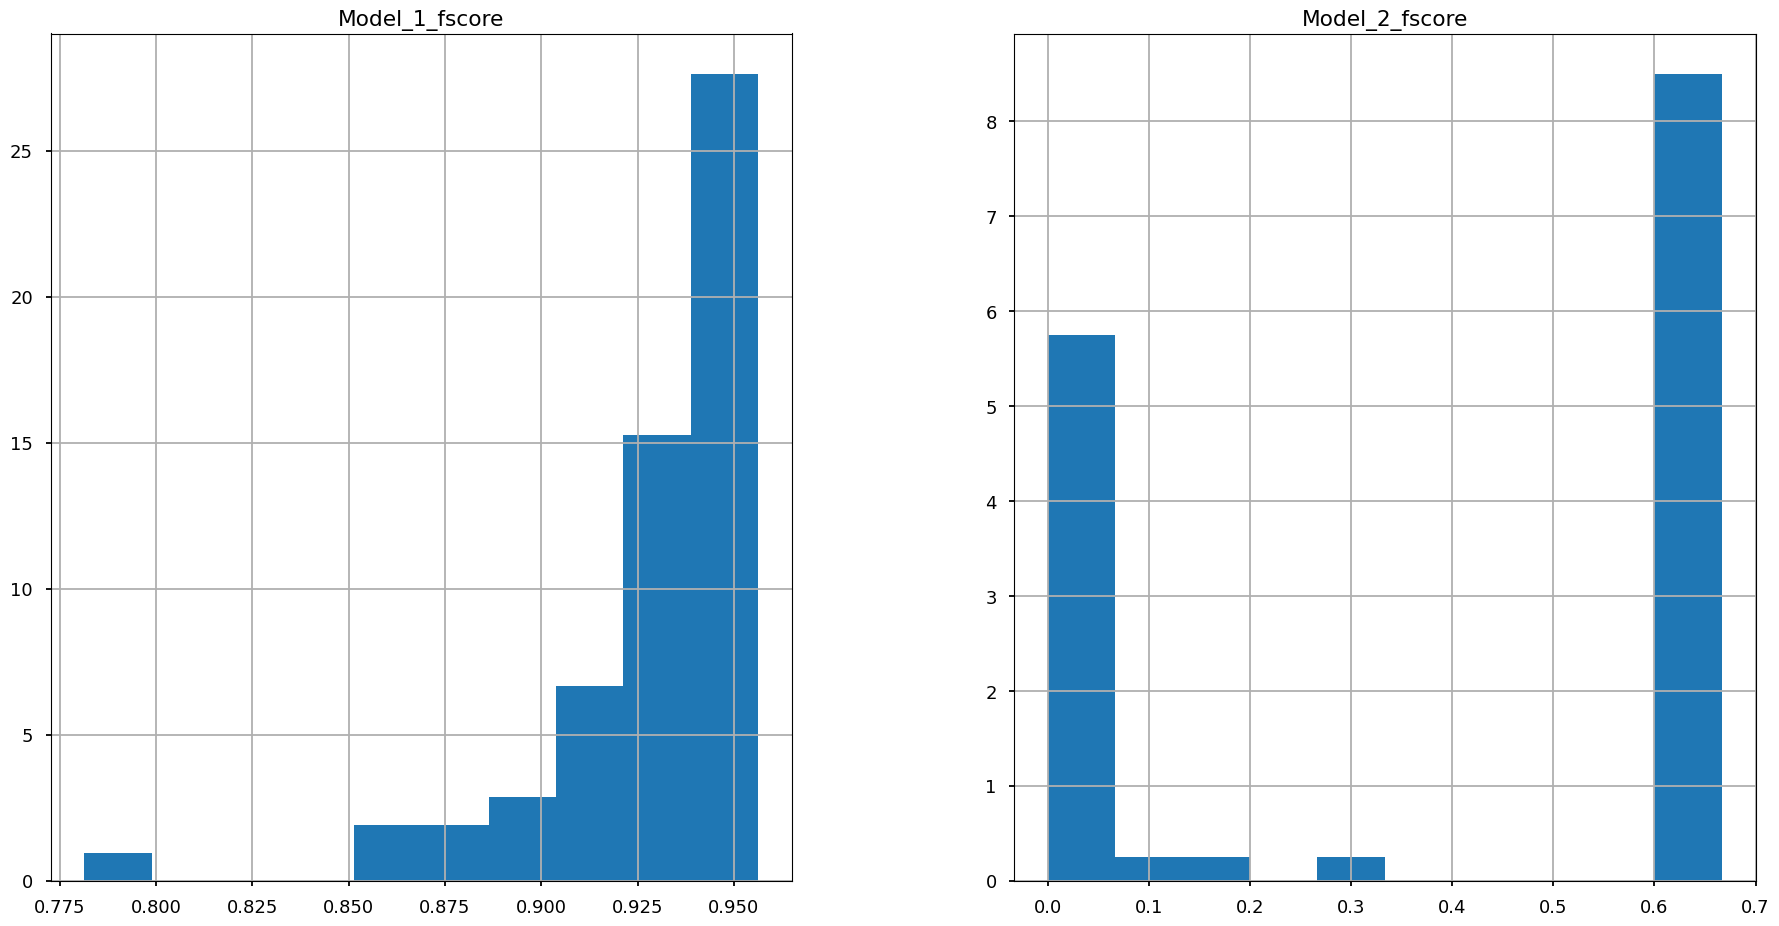

In [62]:
# distribution of the data using a Histogram
results_fscore.hist(density=True)

In [63]:
# testing the Null Hypothesis that a sample comes from a Normal Distribution
alpha = 0.0001;

s, p = stats.normaltest(fscore_df1)
if p < alpha:
  print('Model-1 Data is not normal')
else:
  print('Model-1 Data is normal')

s, p = stats.normaltest(fscore_df2)
if p < alpha:
  print('Model-2 Data is not normal')
else:
  print('Model-2 Data is normal')

Model-1 Data is not normal
Model-2 Data is not normal


In [64]:
# Wilcoxon Signed-Rank Test
# it tests the null hypothesis that two related paired samples come from the same distribution.
# it is a non-parametric version of the paired T-test.

s, p = stats.wilcoxon(fscore_df1[0], fscore_df2[0])

if p < 0.0001:
  print('Null hypothesis rejected, significant difference between the data-sets')
else:
  print('Null hypothesis accepted, no significant difference between the data-sets')

Null hypothesis rejected, significant difference between the data-sets


## RANDOM FOREST MODEL

c:\Users\Sachith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Out-of-Bag Score: 0.9515590102527126
Classification Report for Train Data : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    227565
           1       0.99      0.92      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904

Classification Report for Test Data : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56750
           1       0.99      0.92      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



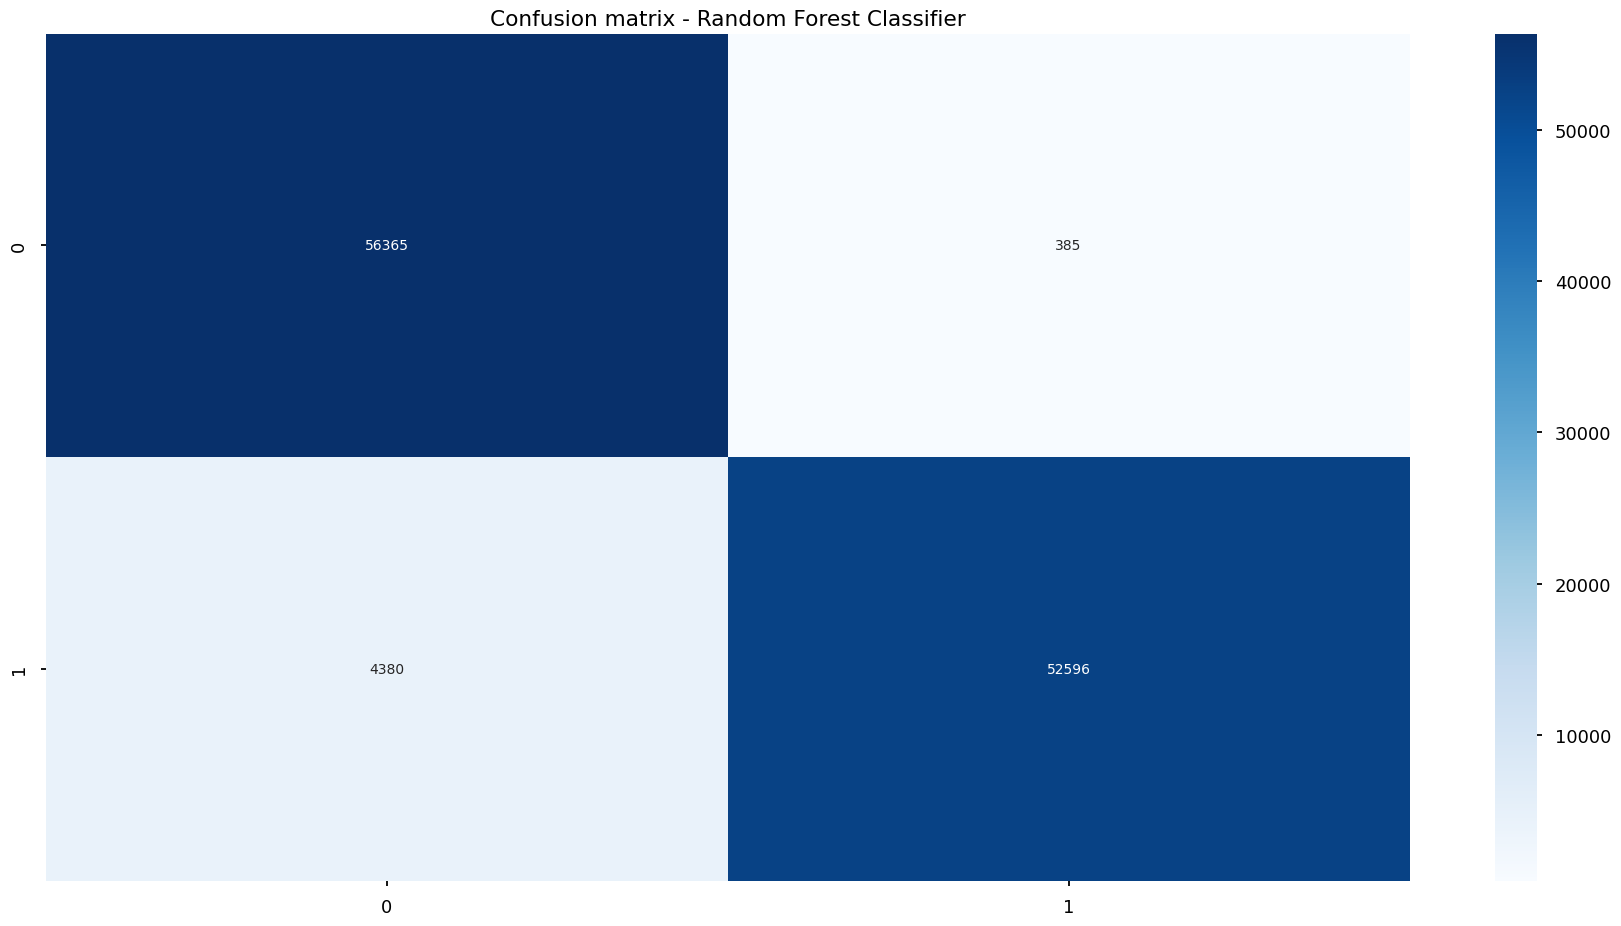

In [29]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=10, min_samples_leaf=200, random_state=100, oob_score=True)
rf.fit(X_train, Y_train)

# Print Out-of-Bag Score
print("Out-of-Bag Score:", rf.oob_score_)

# Execute the prediction on the training set
Y_train_pred = rf.predict(X_train)
print("Classification Report for Train Data : ")
print(classification_report(Y_train, Y_train_pred))

# Execute the prediction on the test set
y_test_pred = rf.predict(X_test)
print("Classification Report for Test Data : ")
print(classification_report(Y_test, y_test_pred))

# Compute confusion matrix
confusionMatrix = confusion_matrix(Y_test, y_test_pred, labels=rf.classes_)

# Display the confusion matrix
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion matrix - Random Forest Classifier")
plt.show()

[(0, 284315), (1, 284315)]


c:\Users\Sachith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Classification Report for Train Daata : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    284315
           1       0.99      0.92      0.96    284315

    accuracy                           0.96    568630
   macro avg       0.96      0.96      0.96    568630
weighted avg       0.96      0.96      0.96    568630

Classification Report for Test Daata : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    284315
           1       0.99      0.92      0.96    284315

    accuracy                           0.96    568630
   macro avg       0.96      0.96      0.96    568630
weighted avg       0.96      0.96      0.96    568630



Text(0.5, 1.0, 'Confusion matrix - Random Forest Classifier')

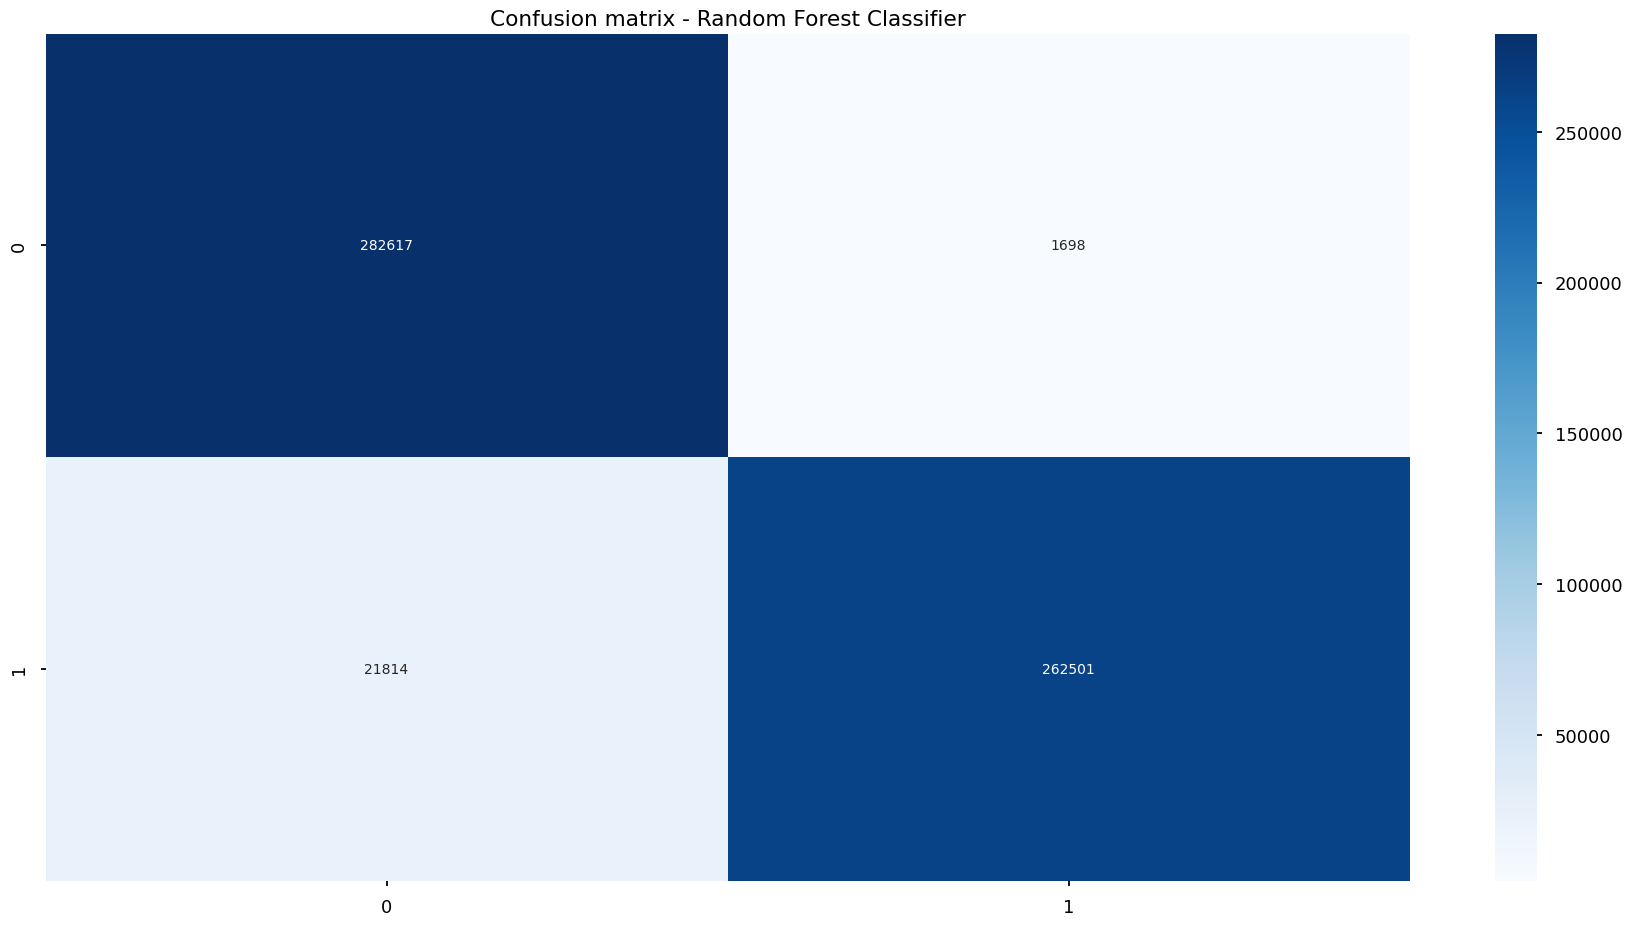

In [42]:
# # Already has the train and test dataset splitted into X and Y
# # Using ADASYN to oversample
# x_train_res, y_train_res = ADASYN().fit_resample(X, Y)

# print(sorted(Counter(y_train_res).items()))

# rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=10, min_samples_leaf=200, random_state=100, oob_score=True)
# rf.fit(x_train_res, y_train_res)
# rf.oob_score_
# # Execute the prediction
# y_train_pred = rf.predict(x_train_res)
# y_train_pred[:10]
# print("Classification Report for Train Daata : ")
# print(classification_report(y_train_res, y_train_pred))
# x_test_res, y_test_res = ADASYN().fit_resample(X, Y)
# y_test_pred = rf.predict(x_test_res)

# print("Classification Report for Test Daata : ")
# print(classification_report(y_test_res, y_test_pred))

# # Compute confusion matrix
# confusionMatrix = confusion_matrix(y_test_res, y_test_pred, labels=rf.classes_)

# # Display the confusion matrix
# sns.heatmap(confusionMatrix, annot = True, fmt ="d", cmap='Blues');
# plt.title("Confusion matrix - Random Forest Classifier")

## LOGISTIC REGRESSION MODEL

### PRE VISUALIZATIONS

<Axes: title={'center': 'Histogram of Amount'}, xlabel='Amount', ylabel='Count'>

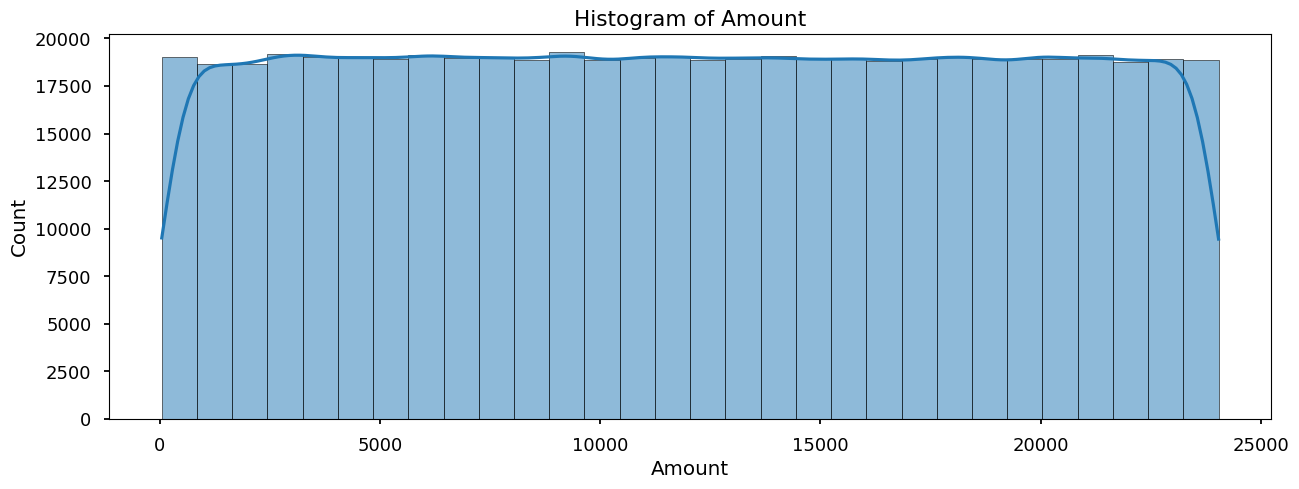

In [20]:
# histplot for Amount
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Histogram of Amount")
sns.histplot(credit_data["Amount"], bins=30, kde=True, ax=ax)

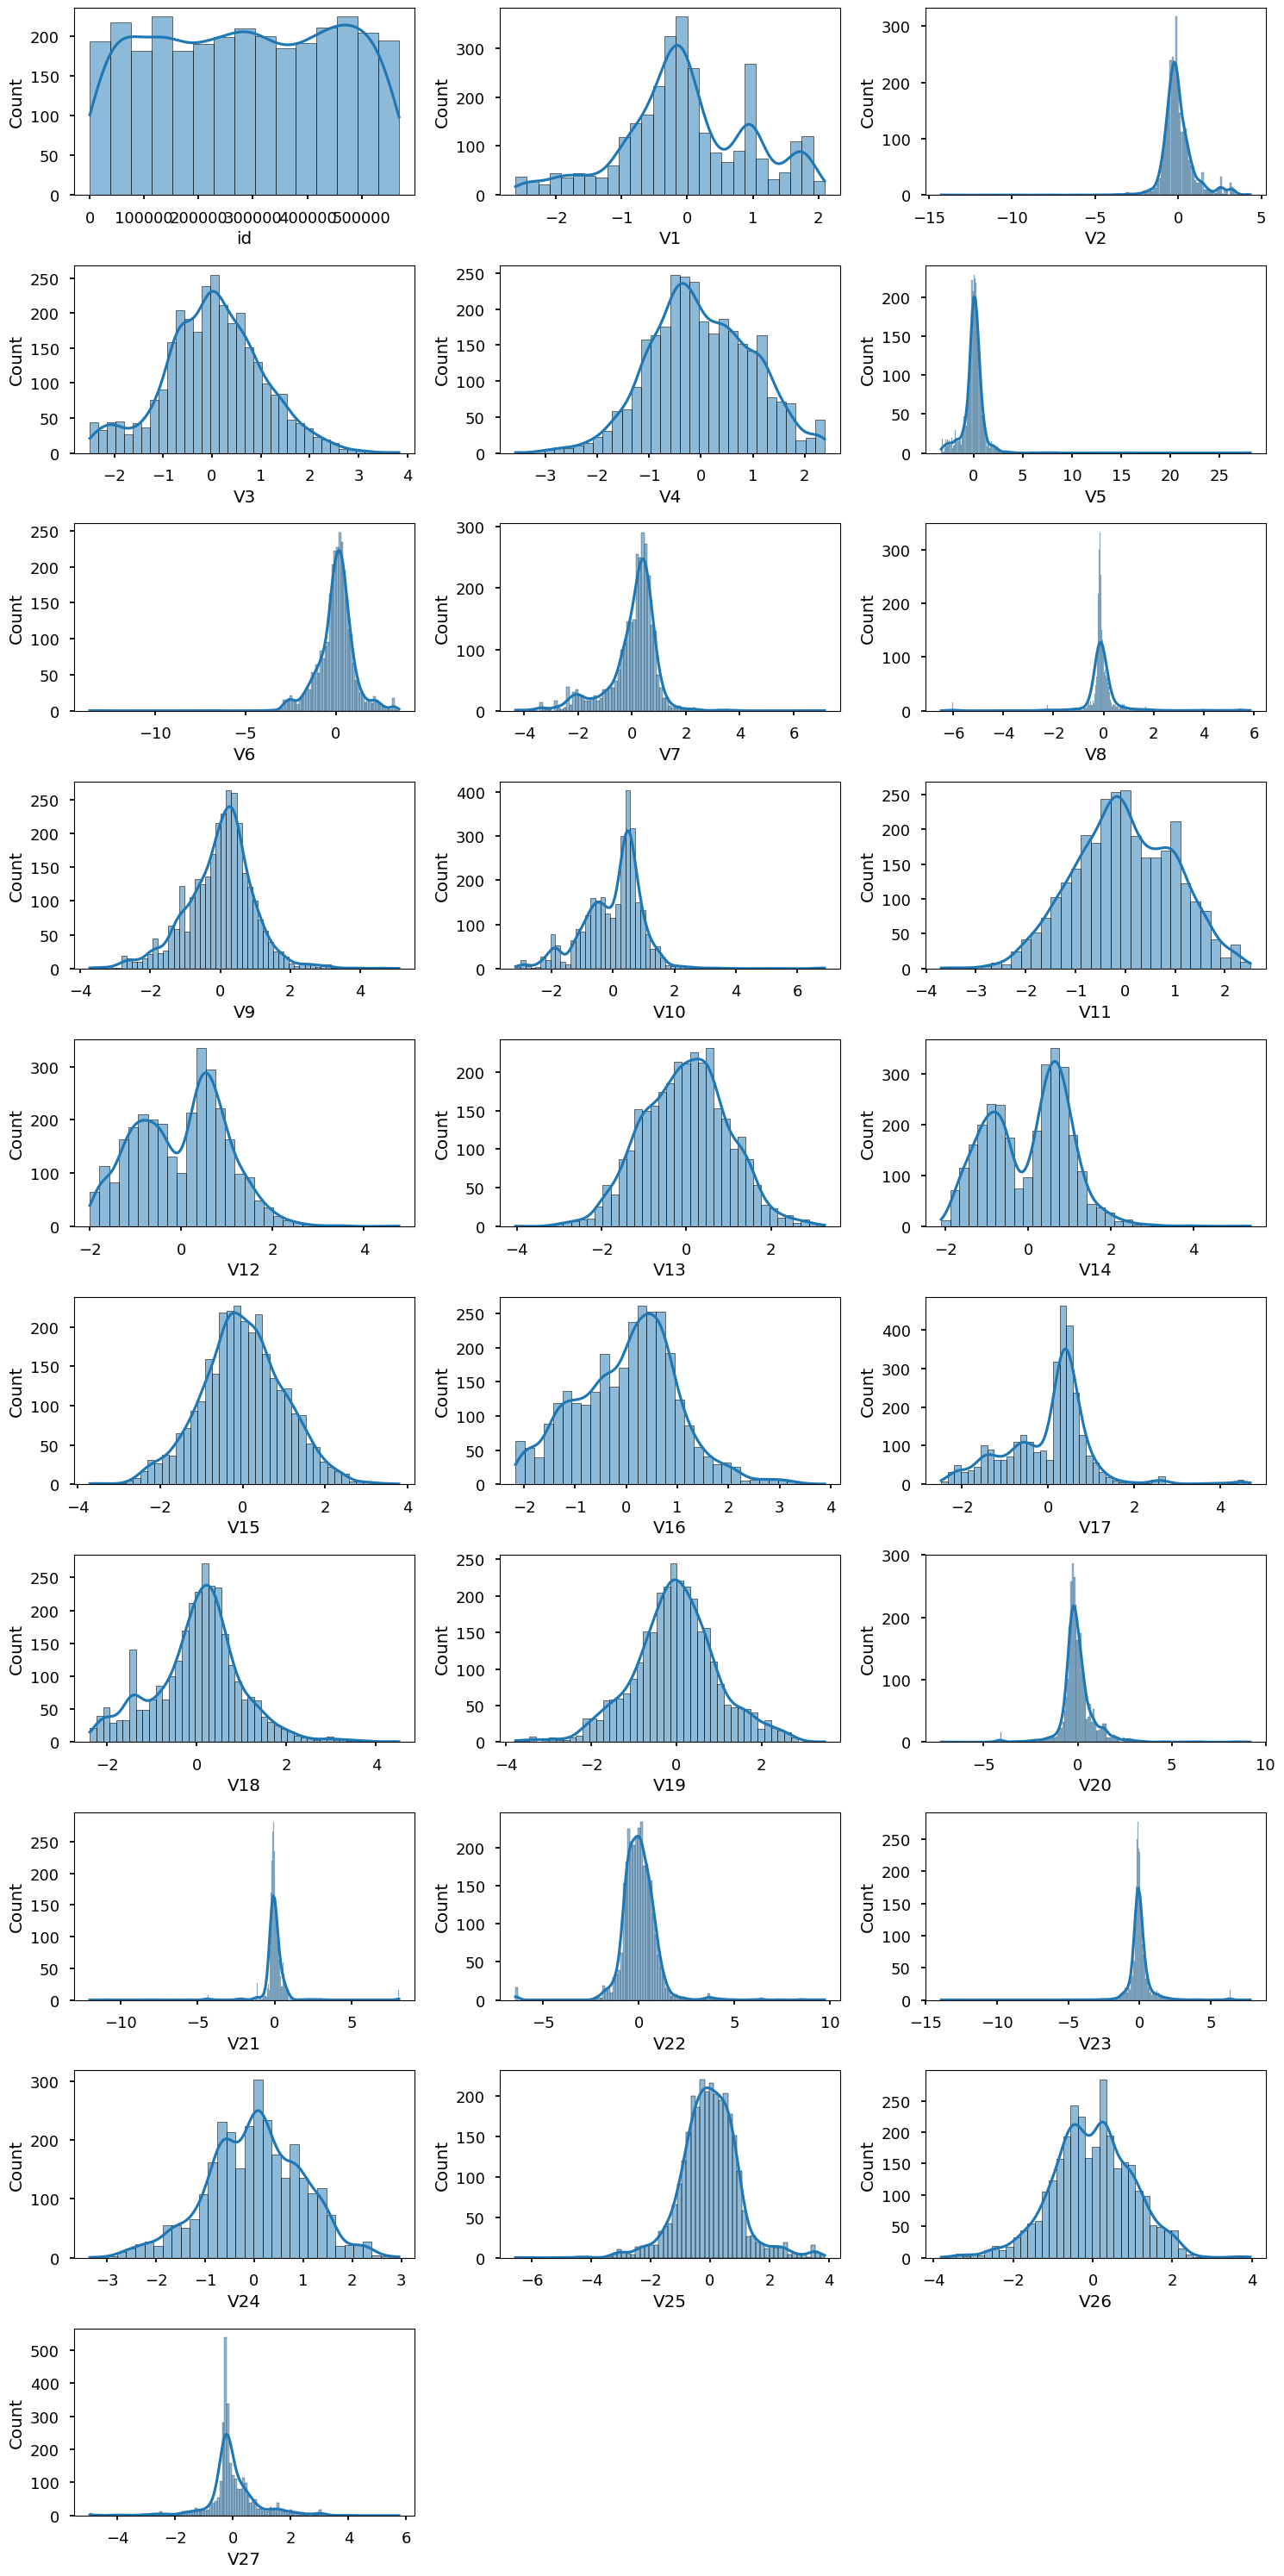

In [21]:
# histplot on features
fig, axs = plt.subplots(nrows = 10, ncols = 3, figsize = (15, 30))
axs = axs.flat

df_temp = credit_data.sample(3000)

for i in range(len(credit_data.columns) -1):
    sns.histplot(
        df_temp[credit_data.columns[i]],
        ax=axs[i],
        kde = True,
    )

fig.delaxes(axs[28])
fig.delaxes(axs[29])
fig.tight_layout()

### SPLITTING IN LOGISTIC

In [21]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### IMPLEMENTATION

In [22]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred_logistic = model.predict(X_test_scaled)

### COUNT THE CONFUSION AND ACCURACY

In [23]:
predict_trues = 0
predict_falses = 0
test_trues = 0
test_falses = 0
fails = 0
correct_trues = 0
correct_falses = 0
test_range = len(Y_test)
for y in range(test_range):
  if int(Y_pred_logistic[y]) == 0:
    predict_falses += 1
  else:
    predict_trues += 1
  if int(Y_test.iloc[y]) == 0:
    test_falses += 1
  else:
    test_trues += 1
  if int(Y_test.iloc[y]) == 1 and int(Y_pred_logistic[y]) == 1:
    correct_trues += 1
  if int(Y_test.iloc[y]) == 0 and int(Y_pred_logistic[y]) == 0:
    correct_falses += 1
  if Y_test.iloc[y] != Y_pred_logistic[y]:
    fails += 1
print("The testing set had ", test_trues, " Trues and", test_falses, " Falses")
print("The predicted set has ", predict_trues, " Trues and", test_falses, " Falses")
print(correct_trues, " of trues has being predicted correctly")
print(correct_falses, " of falses has being predicted correctly")
print("Out of", test_range, ",", fails, "failed")

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_logistic)
print(f'Accuracy: {accuracy}')

The testing set had  56976  Trues and 56750  Falses
The predicted set has  55562  Trues and 56750  Falses
54291  of trues has being predicted correctly
55479  of falses has being predicted correctly
Out of 113726 , 3956 failed
Accuracy: 0.965214638692999


### CONFUSIOC MATRIX

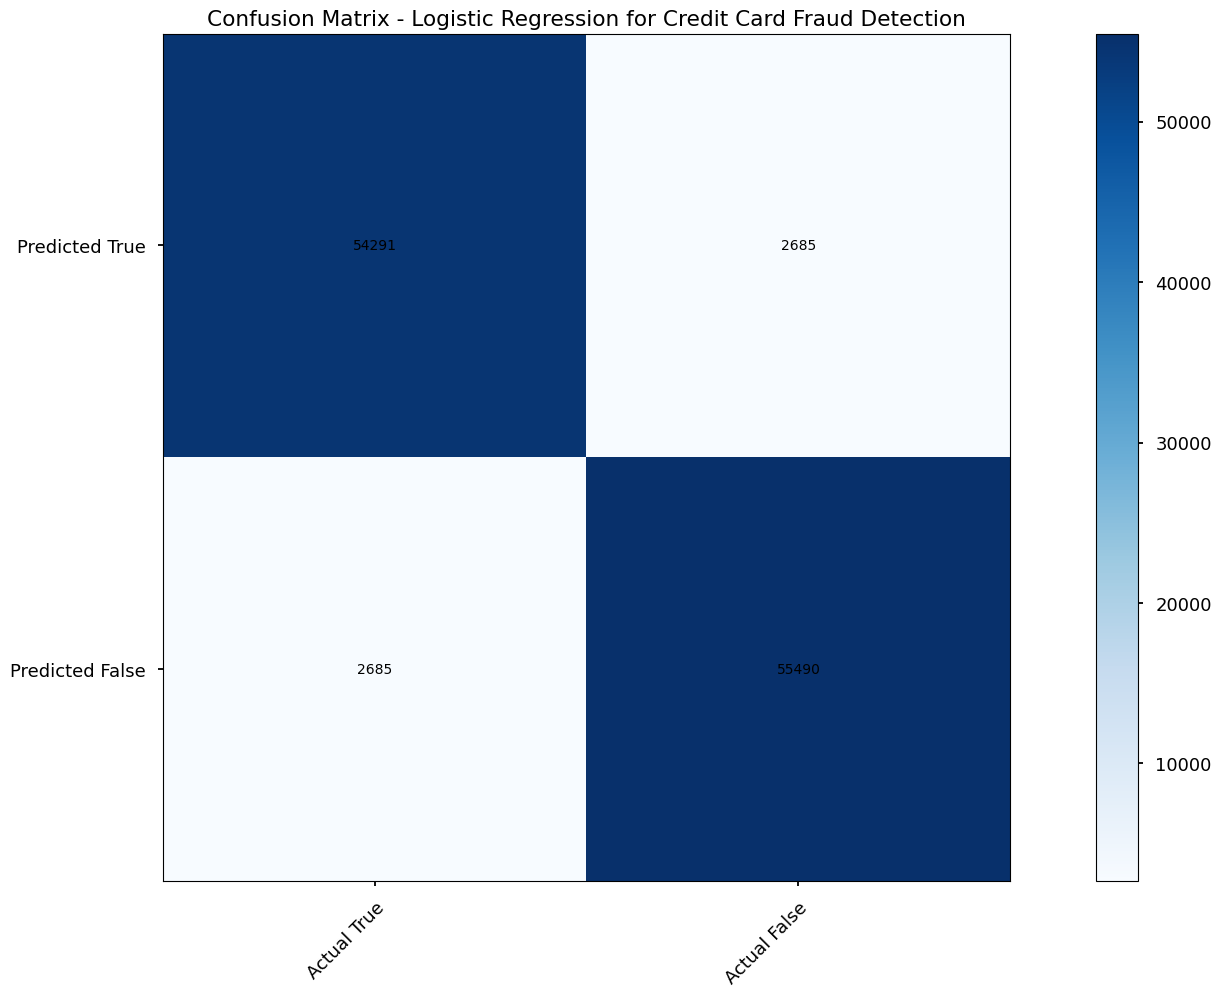

In [24]:
binary = np.array([[54291, 2685],
                   [2685, 55490]])

# Define sample texts for rows and columns
x_labels = ["Actual True","Actual False"]
y_labels = ["Predicted True","Predicted False"]

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(binary, cmap='Blues')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        text = ax.text(j, i, binary[i, j],
                       ha="center", va="center", color="black")

# Add topic at the top
plt.title('Confusion Matrix - Logistic Regression for Credit Card Fraud Detection')
plt.show()

## LINEAR REGRESSION

### IMPLEMENTATION

In [25]:
# Calculating the R-squared

# Training
x_train_linear, x_test_linear, y_train_linear, y_test_linear = train_test_split(X, Y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(x_train_linear, y_train_linear)

y_pred_linear = regressor.predict(x_test_linear)

r_squared = r2_score(y_test_linear, y_pred_linear)
print("R-squared:", r_squared)

R-squared: 0.7646516540315879


### RESULT ANALYSIS

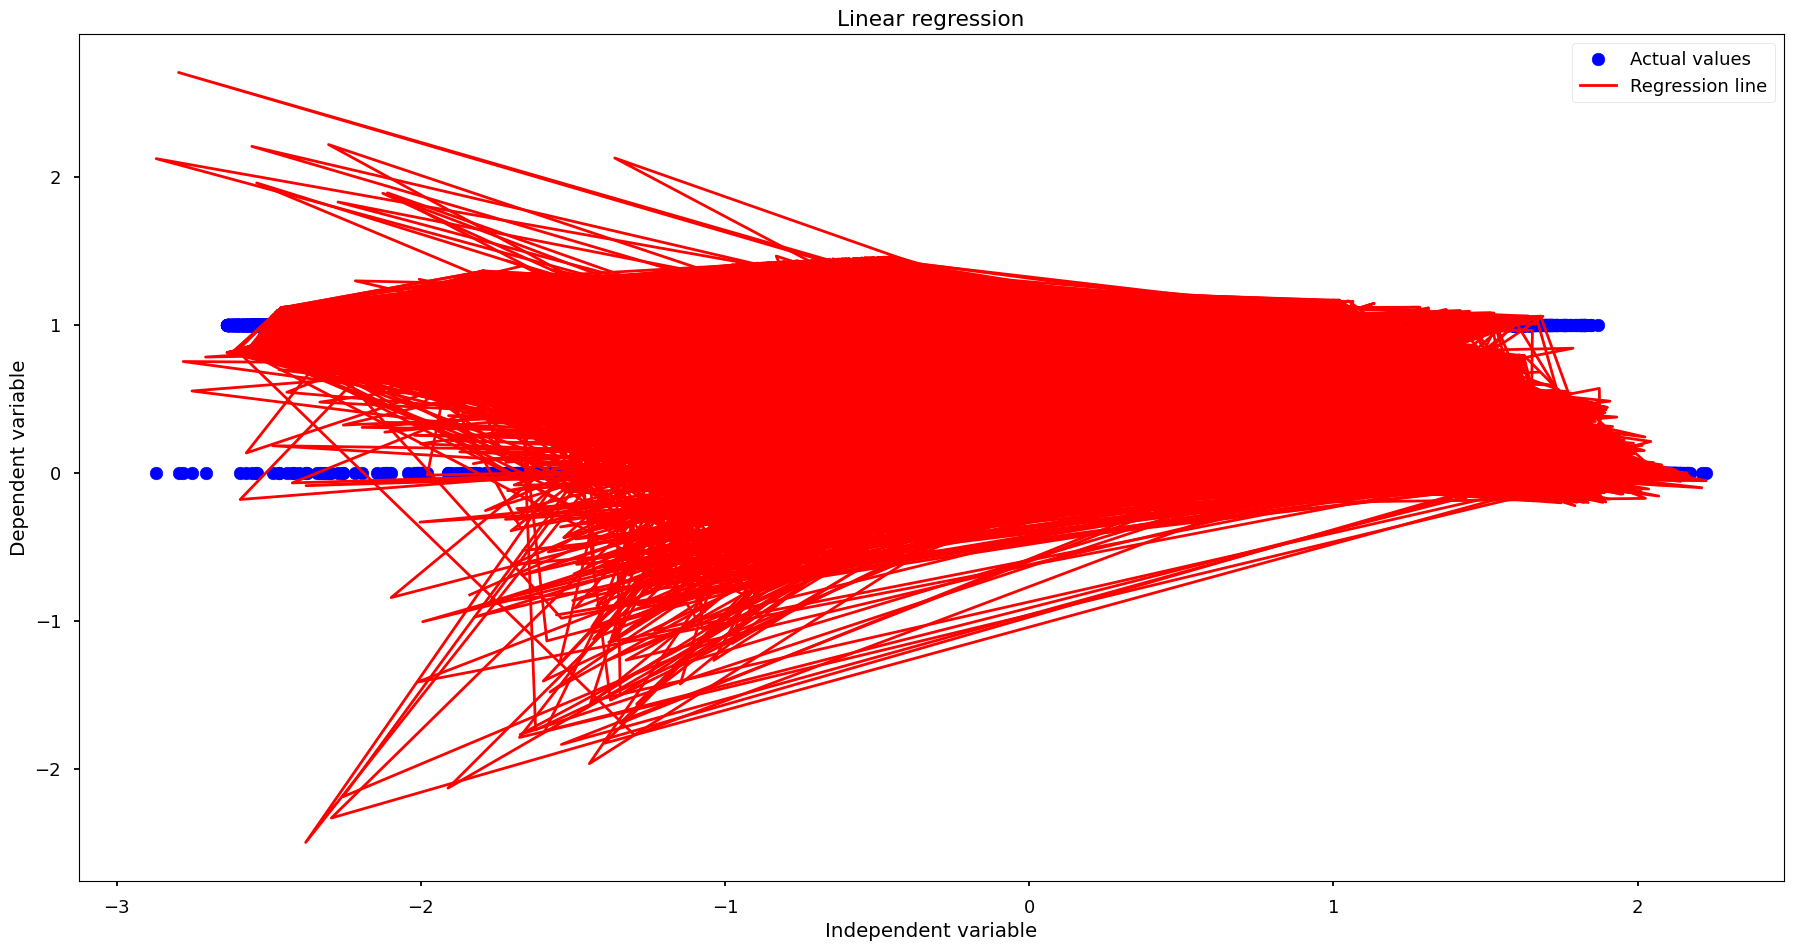

In [26]:
import matplotlib.pyplot as plt

# Set rcParams values
plt.rcParams['agg.path.chunksize'] = 200
plt.rcParams['path.simplify_threshold'] = 0.5  # Adjust the value as needed

# Plot the regression line
plt.scatter(x_test_linear.iloc[:, 0], y_test_linear, color="blue", label="Actual values")
plt.plot(x_test_linear.iloc[:, 0], y_pred_linear, color="red", linewidth=2, label="Regression line")

plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

plt.title("Linear regression")

plt.legend()
plt.show()

## ENSEMBLING TECHNIQUE

In [38]:
# ANN_result, RF_result, Logistic_result, Linear_result = None
# ANN_result = Y_pred_cls
RF_result = y_test_pred
Logistic_result = Y_pred_logistic
Linear_result = y_pred_linear
# print("ANN Results are in the ", type(ANN_result), "type and is with", ANN_result.shape[0], " rows as", ANN_result.ndim, " dimensions")
print("RF Results are in the ", type(RF_result), "type and is with", RF_result.shape[0], " rows as", RF_result.ndim, " dimensions")
print("Logistic Results are in the ", type(Logistic_result), "type and is with", Logistic_result.shape[0], " rows as", Logistic_result.ndim, " dimensions")
print("Linear Results are in the ", type(Linear_result), "type and is with", Linear_result.shape[0], " rows as", Linear_result.ndim, " dimensions")

# Ensembling method results
Ensemble_Output = np.array([])

# Ensemble technique
for i in range(RF_result.shape[0]):
    all_outputs = [RF_result[i] ,Logistic_result[i], Linear_result[i]]
    Ensemble_Output = np.append(Ensemble_Output, mode(all_outputs))

print("Ensemble Outputs are in the ", type(Ensemble_Output), "type and is with", Ensemble_Output.shape[0], " rows as", Ensemble_Output.ndim, " dimensions")
    

RF Results are in the  <class 'numpy.ndarray'> type and is with 113726  rows as 1  dimensions
Logistic Results are in the  <class 'numpy.ndarray'> type and is with 113726  rows as 1  dimensions
Linear Results are in the  <class 'numpy.ndarray'> type and is with 113726  rows as 1  dimensions
Ensemble Outputs are in the  <class 'numpy.ndarray'> type and is with 113726  rows as 1  dimensions


### FINAL RESULTS CONFUSION MATRIX

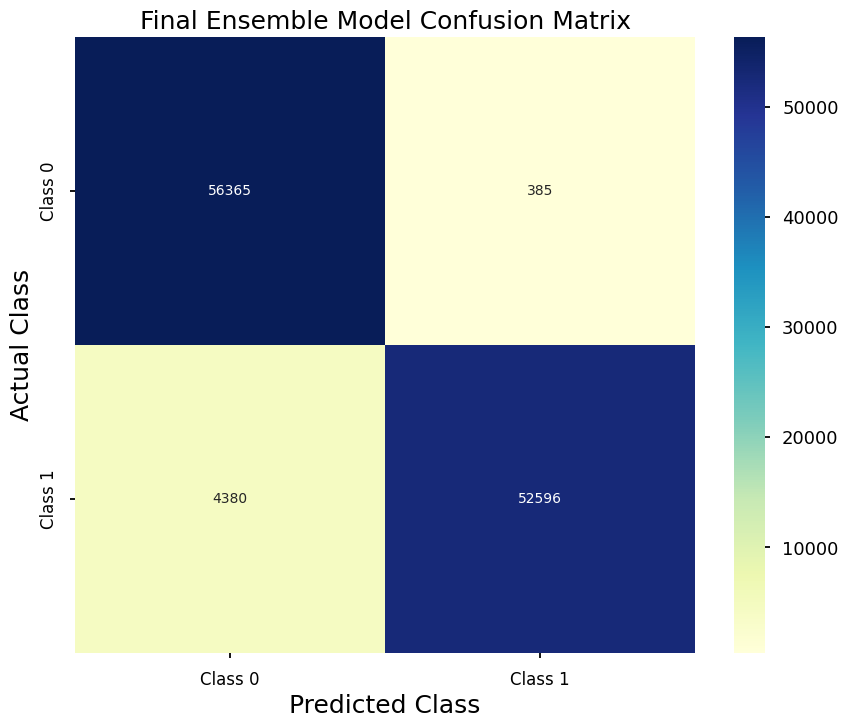

In [40]:
conf_matrix = confusion_matrix(Y_test, Ensemble_Output)
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# labels, title and ticks
label_font = {'size':'18'}  # adjust to fit
plt.xlabel('Predicted Class', fontdict=label_font)
plt.ylabel('Actual Class', fontdict=label_font)
plt.title('Final Ensemble Model Confusion Matrix', fontdict=label_font)
tick_marks = np.arange(len(['Class 0', 'Class 1'])) + 0.5
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=0, fontsize=12)
plt.yticks(tick_marks, ['Class 0', 'Class 1'], rotation=90, fontsize=12)

plt.show()